In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
#Import modules
import numpy as np
import holidays
import pandas as pd
import seaborn as sns
import pickle
import time
import timeit
import sys

import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import datetime
import math
from collections import Counter

#scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency

#sklearn
import sklearn
from sklearn import ensemble
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif

#for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

#other learners
from xgboost import XGBClassifier
import lightgbm as lgb
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#imblearn
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

#webscraping
import requests
from bs4 import BeautifulSoup
import re
import urllib
from IPython.core.display import HTML

#time series
import statsmodels.api as sm
from pylab import rcParams
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA


#warning ignorer
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#reading in the dataset
accident=pd.read_csv('gdrive/MyDrive/Colab Notebooks/771762/Road Safety Data - Accidents 2019.csv',dtype={'Accident_Index':str})
casualty=pd.read_csv('gdrive/MyDrive/Colab Notebooks/771762/Road Safety Data - Casualties 2019.csv',dtype={'Accident_Index':str})
vehicle=pd.read_csv('gdrive/MyDrive/Colab Notebooks/771762/Road Safety Data- Vehicles 2019.csv',dtype={'Accident_Index':str})

In [4]:
acc = accident.copy()
cas = casualty.copy()
veh = vehicle.copy()

In [5]:
#merging the three data and assigning to the variable name, df
df = pd.merge(acc, cas)
df = pd.merge(df, veh)
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,6,1,58,9,-1,-1,-1,2,1,2
2,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,6,1,58,9,-1,-1,-1,2,1,2
3,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,6,2,24,5,-1,-1,-1,3,1,3
4,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,1,1,33,6,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153153,2019984106919,312635.0,573392.0,-3.368899,55.047323,98,3,1,1,18/05/2019,...,1,1,24,5,1997,2,14,6,3,6
153154,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,...,1,1,22,5,2143,2,1,1,1,1
153155,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,...,6,1,61,9,2967,2,5,7,3,7
153156,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,...,5,1,78,11,1597,2,6,8,3,8


In [6]:
# a quick look a some properties of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153158 entries, 0 to 153157
Data columns (total 68 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               153158 non-null  object 
 1   Location_Easting_OSGR                        153116 non-null  float64
 2   Location_Northing_OSGR                       153116 non-null  float64
 3   Longitude                                    153116 non-null  float64
 4   Latitude                                     153116 non-null  float64
 5   Police_Force                                 153158 non-null  int64  
 6   Accident_Severity                            153158 non-null  int64  
 7   Number_of_Vehicles                           153158 non-null  int64  
 8   Number_of_Casualties                         153158 non-null  int64  
 9   Date                                         153158 non-nul

In [7]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [8]:
# Replacing -1 values with np.NaN based on information on the variable lookup, and having a view of the NaN values in each column
df = df.replace(-1, np.NaN)
df.isnull().sum().sort_values(ascending=False).head(50)

Junction_Control                           69378
2nd_Road_Class                             65759
Age_of_Vehicle                             42207
Engine_Capacity_(CC)                       37130
Propulsion_Code                            36856
Driver_Home_Area_Type                      19147
Casualty_Home_Area_Type                    17381
Vehicle_IMD_Decile                         17145
Driver_IMD_Decile                          17145
Casualty_IMD_Decile                        15372
Skidding_and_Overturning                    8313
Hit_Object_in_Carriageway                   8125
Vehicle_Manoeuvre                           8111
Vehicle_Leaving_Carriageway                 8066
Vehicle_Location-Restricted_Lane            7955
Hit_Object_off_Carriageway                  7676
LSOA_of_Accident_Location                   7635
Age_of_Driver                               7505
Age_Band_of_Driver                          7505
Junction_Location                           5715
Was_Vehicle_Left_Han

In [9]:
#Checking the shape of the merged dataset
df.shape

(153158, 68)

In [10]:
#descriptive statistics of the merged data
df.describe(include ='all')

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
count,153158,153116.000000,1.531160e+05,153116.000000,153116.000000,153158.000000,153158.000000,153158.000000,153158.000000,153158,...,153119.000000,153158.000000,145653.000000,145653.000000,116028.000000,116302.000000,110951.000000,136013.000000,134011.000000,136013.000000
unique,117536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019500885809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04/12/2019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,606,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,450392.128843,2.812837e+05,-1.278512,52.418801,28.865975,2.751407,1.929896,1.739785,NaN,...,4.638575,1.376898,40.139860,6.856138,1684.825387,1.584487,8.363422,5.026189,1.305527,5.026189
std,NaN,95956.030954,1.520151e+05,1.406096,1.369240,24.545548,0.473189,0.782397,1.598125,NaN,...,1.919294,0.548184,16.706943,1.822800,1282.998079,1.190713,5.537760,2.793560,0.657075,2.793560
min,NaN,64084.000000,1.081400e+04,-7.525273,49.917760,1.000000,1.000000,1.000000,1.000000,NaN,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,385854.750000,1.756450e+05,-2.212591,51.467264,6.000000,3.000000,1.000000,1.000000,NaN,...,2.000000,1.000000,27.000000,6.000000,1229.000000,1.000000,4.000000,3.000000,1.000000,3.000000
50%,NaN,456831.500000,2.244030e+05,-1.161250,51.902274,30.000000,3.000000,2.000000,1.000000,NaN,...,6.000000,1.000000,37.000000,7.000000,1560.000000,1.000000,8.000000,5.000000,1.000000,5.000000
75%,NaN,528899.250000,3.872080e+05,-0.141722,53.379236,45.000000,3.000000,2.000000,2.000000,NaN,...,6.000000,2.000000,51.000000,8.000000,1968.000000,2.000000,12.000000,7.000000,1.000000,7.000000


#**DATA CLEANING**

###Dealing with Null values

######Age_of_Vehicle Column

In [11]:
#checking the descriptive statistics of the Age_of_Vehicle column
df['Age_of_Vehicle'].describe()

count    110951.000000
mean          8.363422
std           5.537760
min           1.000000
25%           4.000000
50%           8.000000
75%          12.000000
max          94.000000
Name: Age_of_Vehicle, dtype: float64

In [12]:
#checking the unique values in the Age_of_Vehicle column
df['Age_of_Vehicle'].value_counts().head(20)

3.0     8726
4.0     8532
1.0     8401
2.0     8204
5.0     7640
6.0     6759
12.0    6520
11.0    6238
7.0     6217
9.0     6053
10.0    5885
8.0     5846
13.0    5764
14.0    4946
15.0    4198
16.0    3345
17.0    2530
18.0    1607
19.0    1060
20.0     717
Name: Age_of_Vehicle, dtype: int64

In [13]:
# I will fill the NaN of Age_of_Vehicle column with the median based on the descriptive statistics above and insight from the distribution of values above.
# Here the values are clustered, albeit with a few extreme values. the IQR and STD is small, hence the deciscion to fill NaN with the median value, 8.
df['Age_of_Vehicle'].fillna(8, inplace=True)


##### Engine_Capacity_(CC) Column

In [14]:
df['Engine_Capacity_(CC)'].describe()

count    116028.000000
mean       1684.825387
std        1282.998079
min           2.000000
25%        1229.000000
50%        1560.000000
75%        1968.000000
max       29980.000000
Name: Engine_Capacity_(CC), dtype: float64

In [15]:
#i will fill the nan values with the median value on the basis of the decision on the previous cells.
df['Engine_Capacity_(CC)'].fillna(1560, inplace=True)

#### Propulsion_Code

In [16]:
df['Propulsion_Code'].describe()

count    116302.000000
mean          1.584487
std           1.190713
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          12.000000
Name: Propulsion_Code, dtype: float64

In [17]:
#i will fill the nan values with the median value on the basis of the decision on the previous cells.
df['Propulsion_Code'].fillna(1, inplace=True)

#### Driver_Home_Area_Type Column

In [18]:
df['Driver_Home_Area_Type'].describe()

count    134011.000000
mean          1.305527
std           0.657075
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: Driver_Home_Area_Type, dtype: float64

In [19]:
df['Driver_Home_Area_Type'].value_counts()

1.0    107779
3.0     14712
2.0     11520
Name: Driver_Home_Area_Type, dtype: int64

In [20]:
#Here there are only 3 unique values with the mode constituting about over 75% of the values. To avoid skewness of distribution after filling NaN, 
#i will fill the nan values with the mode value.
df['Driver_Home_Area_Type'].fillna(1.0, inplace=True)

#### Casualty_Home_Area_Type Column

In [21]:
df['Casualty_Home_Area_Type'].describe()

count    135777.000000
mean          1.296773
std           0.648600
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: Casualty_Home_Area_Type, dtype: float64

In [22]:
df['Casualty_Home_Area_Type'].value_counts()

1.0    109873
3.0     14391
2.0     11513
Name: Casualty_Home_Area_Type, dtype: int64

In [23]:
#i will fill the nan values with the mode value based on the reason above
df['Casualty_Home_Area_Type'].fillna(1.0, inplace=True)

#### Vehicle_IMD_Decile, Driver_IMD_Decile and Casualty_IMD_Decile Columns

In [24]:
df['Vehicle_IMD_Decile'].value_counts()

2.0     16643
3.0     15901
1.0     15886
4.0     15414
5.0     14161
6.0     13515
7.0     12495
8.0     11649
9.0     10946
10.0     9403
Name: Vehicle_IMD_Decile, dtype: int64

In [25]:
df['Driver_IMD_Decile'].value_counts()

2.0     16643
3.0     15901
1.0     15886
4.0     15414
5.0     14161
6.0     13515
7.0     12495
8.0     11649
9.0     10946
10.0     9403
Name: Driver_IMD_Decile, dtype: int64

In [26]:
df['Casualty_IMD_Decile'].value_counts()

2.0     17377
1.0     16415
3.0     16368
4.0     15546
5.0     14190
6.0     13579
7.0     12485
8.0     11549
9.0     10861
10.0     9416
Name: Casualty_IMD_Decile, dtype: int64

In [27]:
#The distributions in this columns seem even, hence i will fill NaN in these columns by forward fill method
df['Vehicle_IMD_Decile'].fillna(method='ffill', inplace=True)
df['Driver_IMD_Decile'].fillna(method='ffill', inplace=True)
df['Casualty_IMD_Decile'].fillna(method='ffill', inplace=True)

#### 2nd_Road_Class Column

In [28]:
df['2nd_Road_Class'].value_counts()

6.0    59561
3.0    16012
4.0     6209
5.0     4767
1.0      764
2.0       86
Name: 2nd_Road_Class, dtype: int64

In [29]:
# About 40% of the data in this column is NaN. of the remaining values, 60% in unknown(belonging to the class, 6). I therefore fill missing values with the mode.
df['2nd_Road_Class'].fillna(6.0, inplace=True)

#### Junction_Control Column

In [30]:
df['Junction_Control'].value_counts()

4.0    65283
2.0    17015
3.0     1005
1.0      472
0.0        5
Name: Junction_Control, dtype: int64

In [31]:
# Similar to the column above, about 45% NaN in this column and the remaining values have about 70% represented by the modal class. I will fill the NaN with the mode(4.0).
df['Junction_Control'].fillna(4.0, inplace=True)

In [32]:
df.isnull().sum().sort_values(ascending=False).head(38)

Skidding_and_Overturning                   8313
Hit_Object_in_Carriageway                  8125
Vehicle_Manoeuvre                          8111
Vehicle_Leaving_Carriageway                8066
Vehicle_Location-Restricted_Lane           7955
Hit_Object_off_Carriageway                 7676
LSOA_of_Accident_Location                  7635
Age_of_Driver                              7505
Age_Band_of_Driver                         7505
Junction_Location                          5715
Was_Vehicle_Left_Hand_Drive?               5691
Pedestrian_Crossing-Human_Control          4058
1st_Point_of_Impact                        4037
Pedestrian_Crossing-Physical_Facilities    3642
Towing_and_Articulation                    3273
Age_of_Casualty                            3255
Age_Band_of_Casualty                       3255
Special_Conditions_at_Site                 2027
Carriageway_Hazards                        1759
Junction_Detail                            1542
Road_Surface_Conditions                 

#### Using interpolate to fill NaN in the remaining columns with NaN values > 5,000

In [33]:
interpolate_df = df[['Skidding_and_Overturning', 'Hit_Object_in_Carriageway', 'Vehicle_Manoeuvre', 'Vehicle_Leaving_Carriageway', 'Vehicle_Location-Restricted_Lane', 'Hit_Object_off_Carriageway','Age_of_Driver',
                'Age_Band_of_Driver', 'Junction_Location', 'Was_Vehicle_Left_Hand_Drive?']]


# to interpolate the missing values
#interpolate_df.interpolate(method ='linear', limit_direction ='forward')

In [34]:
interpolate_df.isnull().sum()

Skidding_and_Overturning            8313
Hit_Object_in_Carriageway           8125
Vehicle_Manoeuvre                   8111
Vehicle_Leaving_Carriageway         8066
Vehicle_Location-Restricted_Lane    7955
Hit_Object_off_Carriageway          7676
Age_of_Driver                       7505
Age_Band_of_Driver                  7505
Junction_Location                   5715
Was_Vehicle_Left_Hand_Drive?        5691
dtype: int64

In [35]:
interpolate_df = df[['Skidding_and_Overturning', 'Hit_Object_in_Carriageway', 'Vehicle_Manoeuvre', 'Vehicle_Leaving_Carriageway', 'Vehicle_Location-Restricted_Lane', 'Hit_Object_off_Carriageway','Age_of_Driver',
                'Age_Band_of_Driver', 'Junction_Location', 'Was_Vehicle_Left_Hand_Drive?']]

In [36]:
# to interpolate the missing values
interpolate_df = interpolate_df.interpolate(method ='linear', limit_direction ='forward')

In [37]:
interpolate_df.isnull().sum()

Skidding_and_Overturning            4
Hit_Object_in_Carriageway           4
Vehicle_Manoeuvre                   3
Vehicle_Leaving_Carriageway         4
Vehicle_Location-Restricted_Lane    4
Hit_Object_off_Carriageway          4
Age_of_Driver                       0
Age_Band_of_Driver                  0
Junction_Location                   3
Was_Vehicle_Left_Hand_Drive?        4
dtype: int64

In [38]:
columns = ['Skidding_and_Overturning', 'Hit_Object_in_Carriageway', 'Vehicle_Manoeuvre', 'Vehicle_Leaving_Carriageway', 'Vehicle_Location-Restricted_Lane', 'Hit_Object_off_Carriageway', 'Age_of_Driver', 'Age_Band_of_Driver',
           'Junction_Location', 'Was_Vehicle_Left_Hand_Drive?']

df[columns] = interpolate_df[columns]
df.isnull().sum().sort_values(ascending=False).head(38)

LSOA_of_Accident_Location                  7635
Pedestrian_Crossing-Human_Control          4058
1st_Point_of_Impact                        4037
Pedestrian_Crossing-Physical_Facilities    3642
Towing_and_Articulation                    3273
Age_of_Casualty                            3255
Age_Band_of_Casualty                       3255
Special_Conditions_at_Site                 2027
Carriageway_Hazards                        1759
Junction_Detail                            1542
Road_Surface_Conditions                    1522
Sex_of_Casualty                             733
Car_Passenger                               589
2nd_Road_Number                             178
Speed_limit                                  86
Bus_or_Coach_Passenger                       84
Vehicle_Type                                 84
Time                                         81
Pedestrian_Road_Maintenance_Worker           74
Latitude                                     42
Location_Northing_OSGR                  

In [39]:
my_df=df.copy()

#### LSOA_of_Accident_Location Column

In [40]:
my_df['LSOA_of_Accident_Location'].describe()

count        145523
unique        27762
top       E01032739
freq            212
Name: LSOA_of_Accident_Location, dtype: object

In [41]:
my_df['LSOA_of_Accident_Location'].value_counts()

E01032739    212
E01004736    136
E01033595    104
E01002444     99
E01023722     94
            ... 
E01004112      1
E01001991      1
E01003650      1
E01026647      1
W01000485      1
Name: LSOA_of_Accident_Location, Length: 27762, dtype: int64

In [42]:
#Since the unique values are many, i have decided to fill NaN by forward fill method
my_df['LSOA_of_Accident_Location'].fillna(method='ffill', inplace=True)

#### Location_Easting_OSGR and Location_Northing_OSGR Columns

In [43]:
#checking for correlation between Location_Easting_OSGR & Location_Northing_OSGR AND Longitude & Latitude
print(my_df['Location_Easting_OSGR'].corr(my_df['Longitude']))
print(my_df['Location_Northing_OSGR'].corr(my_df['Latitude']))

0.9994118890155644
0.9999693752452399


In [44]:
#I am dropping Location_Easting_OSGR & Location_Northing_OSGR because they are almost perfectly correlated with Longitude & Latitude respectively
my_df = my_df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1)

#### Dealing with the remaining columns with NaN

In [45]:
#checking the unique rows with NaN values
my_df[my_df.isna().sum(axis=1)>1]

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,...,6.0,1,58.000000,9.0,1560.0,1.0,8.0,2.0,1.0,2.0
1,2019010128300,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,...,6.0,1,58.000000,9.0,1560.0,1.0,8.0,2.0,1.0,2.0
2,2019010128300,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,...,6.0,1,58.000000,9.0,1560.0,1.0,8.0,2.0,1.0,2.0
3,2019010152270,-0.127949,51.436208,1,3,2,1,15/01/2019,3,21:45,...,6.0,2,24.000000,5.0,1560.0,1.0,8.0,3.0,1.0,3.0
39,2019010155284,-0.061492,51.518706,1,3,2,1,01/01/2019,3,06:15,...,2.0,1,47.000000,8.0,1560.0,1.0,8.0,8.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151777,201997GP02001,-4.268290,55.864452,97,3,2,1,28/01/2019,2,18:00,...,5.0,1,39.250000,7.0,1560.0,1.0,8.0,9.0,1.0,9.0
151894,201997KA00106,-4.447290,55.856005,97,3,2,1,27/06/2019,5,09:07,...,5.0,1,80.000000,11.0,1198.0,1.0,13.0,5.0,1.0,5.0
152368,201997ND00304,-4.001298,55.820206,97,3,2,2,22/04/2019,2,14:45,...,5.0,1,60.000000,9.0,999.0,1.0,8.0,3.0,1.0,3.0
152468,201997QA00107,-4.165504,55.763472,97,3,2,2,02/07/2019,3,15:05,...,1.0,2,25.666667,5.0,1248.0,1.0,8.0,8.0,1.0,8.0


In [46]:
#drop the remaining nulls since they constitute only about 8% of the entire data
my_df = my_df.dropna()

In [47]:
my_df = my_df.reset_index(drop = True)

In [48]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141267 entries, 0 to 141266
Data columns (total 66 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               141267 non-null  object 
 1   Longitude                                    141267 non-null  float64
 2   Latitude                                     141267 non-null  float64
 3   Police_Force                                 141267 non-null  int64  
 4   Accident_Severity                            141267 non-null  int64  
 5   Number_of_Vehicles                           141267 non-null  int64  
 6   Number_of_Casualties                         141267 non-null  int64  
 7   Date                                         141267 non-null  object 
 8   Day_of_Week                                  141267 non-null  int64  
 9   Time                                         141267 non-nul

## QUESTION A
###### Are there significant hours of the day, and days of the week, on which accidents occur?

In [49]:
df1 = my_df.copy()

###### First, i will do a little bit of feaure engineering to create columns necessary to address the **question**

In [50]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day
df1['Day_no'] = df1['Date'].dt.dayofyear
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')

In [51]:
#pull time data and create hour column
df1['Hour'] = df1['Time'].str[0:2]
 #convert to numeric    
df1['Hour'] =  pd.to_numeric(df1['Hour'])
#convert to integer
df1['Hour'] = df1['Hour'].astype('int')

In [52]:
#pull time data and create minute column
df1['Minute'] = df1['Time'].str[3:5]
 #convert to numeric    
df1['Minute'] =  pd.to_numeric(df1['Minute'])
#convert to integer
df1['Minute'] = df1['Minute'].astype('int')

In [53]:
# define a function that turns the hours into daily hour groups
def day_grouping(hour):
    if hour >= 5 and hour < 10:
        return "Morning Hours"
    elif hour >= 10 and hour < 15:
        return "Office Hours"
    elif hour >= 15 and hour < 19:
        return "Afternoon Rush"
    elif hour >= 19 and hour < 23:
        return "Evening Hours"
    else:
        return "Night"

In [54]:
# create a dictionary to later look up the daily hour groups
daytime_groups = {'Morning': 'Morning Hours: 5 - 9.59', 
                  'Office Hours': 'Office Hours: 10 - 14.59', 
                  'Afternoon Rush': 'Afternoon Rush: 15 - 16.59', 
                  'Evening': 'Evening Hours: 19 - 22.59', 
                  'Night': 'Night: 23 - 4.59'}

#### Significant hours of the day on which accidents occur

In [55]:
# applying the function to hour column and obtaining the mode to show the hour accidents occur most frequently
df1['Daily_Time_Periods'] = df1['Hour'].apply(day_grouping)
grouped_time = df1[['Time', 'Hour', 'Daily_Time_Periods']]
grouped_time['Hour'].mode()

0    17
dtype: int64

In [56]:
grouped_time

,Time,Hour,Daily_Time_Periods
0,01:50,1,Night
1,01:20,1,Night
2,00:40,0,Night
3,00:40,0,Night
4,02:45,2,Night
...,...,...,...
141262,01:00,1,Night
141263,08:46,8,Morning Hours
141264,15:30,15,Afternoon Rush
141265,14:10,14,Office Hours


In [57]:
xgrouped_time = grouped_time[['Hour',	'Daily_Time_Periods']].groupby(['Hour']).size().reset_index()
xgrouped_time.columns = ['Hour', 'Count']
xgrouped_time

,Hour,Count
0,0,2379
1,1,1660
2,2,1198
3,3,1005
4,4,972
5,5,1364
6,6,2737
7,7,6057
8,8,9103
9,9,6346


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Accidents Per Hour')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text major ticklabel objects>)

Text(0.5, 0, '\nHour')

Text(0, 0.5, '\nNumber of Accidents')

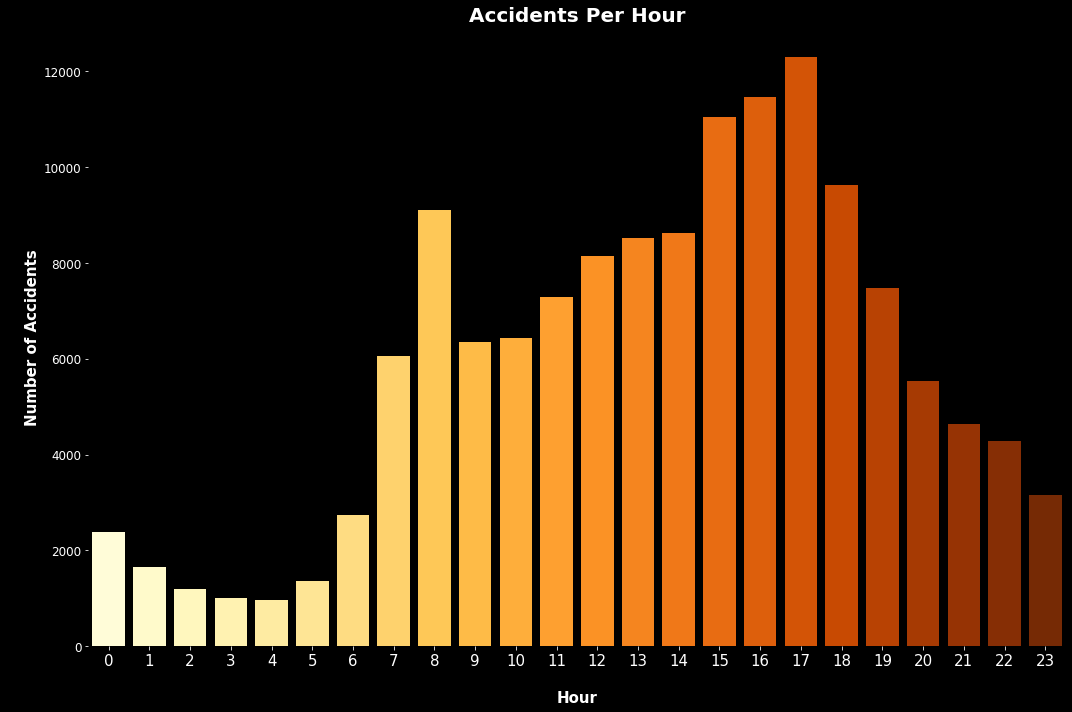

In [58]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(xgrouped_time['Hour'],xgrouped_time['Count'], 
            saturation=1, palette='YlOrBr')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Hour",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nHour", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()

#### Significant days of the week on which accidents occur

In [59]:
# Changing days of the week to their actual names (Sunday to Saturday)
days_of_the_week = {
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    7: "Saturday"
}
df1['Day_of_Week'] = df1['Day_of_Week'].map(days_of_the_week)

In [61]:
grouped_day = df1[['Day_of_Week',	'Daily_Time_Periods']].groupby(['Day_of_Week']).size().reset_index()
grouped_day.columns = ['Day_of_Week', 'Count']
grouped_day

,Day_of_Week,Count
0,Friday,22846
1,Monday,19762
2,Saturday,19657
3,Sunday,16423
4,Thursday,21070
5,Tuesday,20671
6,Wednesday,20838


In [62]:
cats_dayorder = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
grouped_df_weekday = grouped_day.groupby(['Day_of_Week']).sum().reindex(cats_dayorder) 
grouped_df_weekday

,Count
Day_of_Week,
Sunday,16423
Monday,19762
Tuesday,20671
Wednesday,20838
Thursday,21070
Friday,22846
Saturday,19657


In [65]:
grouped_df_weekday.index

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'],
      dtype='object', name='Day_of_Week')

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Accidents Per Day')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 0, '\nDay')

Text(0, 0.5, '\nNumber of Accidents')

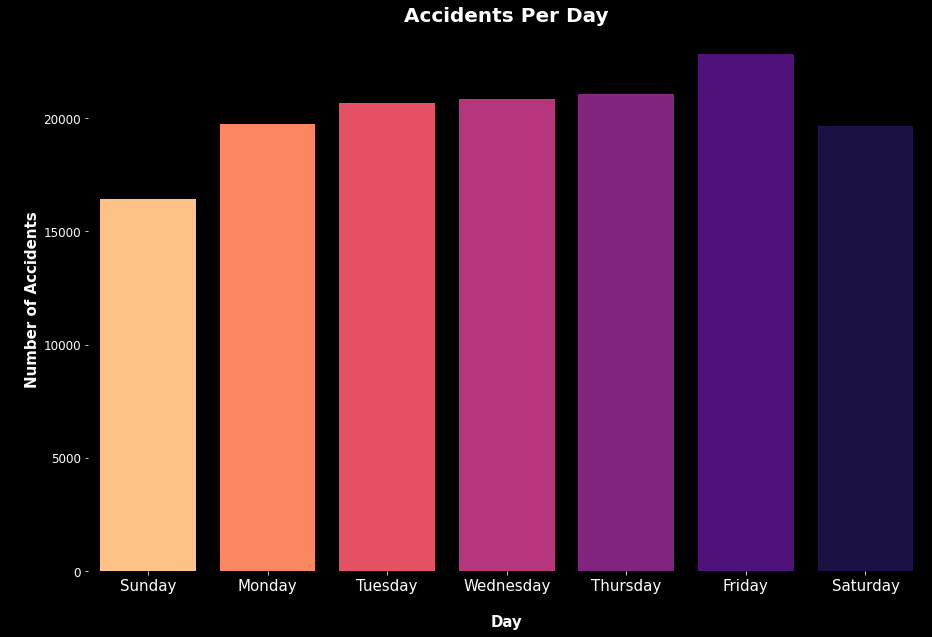

In [66]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(grouped_df_weekday.index,grouped_df_weekday['Count'], saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Day",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nDay", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")

### QUESTION B
##### For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur?

In [67]:
df1['Vehicle_Type'].value_counts()

9.0     96442
1.0     14693
3.0      7088
19.0     5255
5.0      5121
11.0     3503
8.0      2912
4.0      1993
2.0      1344
21.0      719
90.0      599
20.0      330
10.0      330
97.0      265
22.0      225
98.0      200
17.0      112
16.0       63
23.0       56
18.0       17
Name: Vehicle_Type, dtype: int64

In [68]:
# define a function to fetch details of motor vehicle types in the vehicle dataset and returning values for non motorbike as Nil
def motor_veh(Veh_Type):
    if Veh_Type == 2:
        return "MBike <= 50cc"
    elif Veh_Type == 3:
        return "MBike <= 125cc"
    elif Veh_Type == 4:
        return "MBike >125cc-500cc"
    elif Veh_Type == 5:
        return "MBike >500cc"
    elif Veh_Type == 4:
        return "MBike unknown"
    else:
        return 'Nil'

In [69]:
# apply our function to the dataset
df1['Veh_match'] = df1['Vehicle_Type'].apply(motor_veh)
Motorbike_data = df1[['Vehicle_Type', 'Hour', 'Veh_match', 'Day_of_Week']]
Motorbike_data.head()

,Vehicle_Type,Hour,Veh_match,Day_of_Week
0,1.0,1,Nil,Tuesday
1,9.0,1,Nil,Tuesday
2,9.0,0,Nil,Tuesday
3,9.0,0,Nil,Tuesday
4,9.0,2,Nil,Tuesday


In [70]:
Motorbike_data = Motorbike_data[Motorbike_data.Veh_match != 'Nil'] #dropping the rows with Nil value which are non motornike
Motorbike_data.head()

,Vehicle_Type,Hour,Veh_match,Day_of_Week
21,4.0,0,MBike >125cc-500cc,Tuesday
25,3.0,14,MBike <= 125cc,Tuesday
26,3.0,15,MBike <= 125cc,Tuesday
31,4.0,13,MBike >125cc-500cc,Tuesday
32,5.0,16,MBike >500cc,Tuesday


In [71]:
grouped_mbike = Motorbike_data[['Vehicle_Type',	'Hour']].groupby(['Hour']).size().reset_index()
grouped_mbike.columns = ['Hour', 'Count']
grouped_mbike

,Hour,Count
0,0,157
1,1,107
2,2,71
3,3,41
4,4,55
5,5,119
6,6,294
7,7,781
8,8,914
9,9,573


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Motorbike Accidents Per Hour of the Day')

Text(0.5, 0, 'Hours of the Day')

Text(0, 0.5, 'Number of Motobike Accidents')

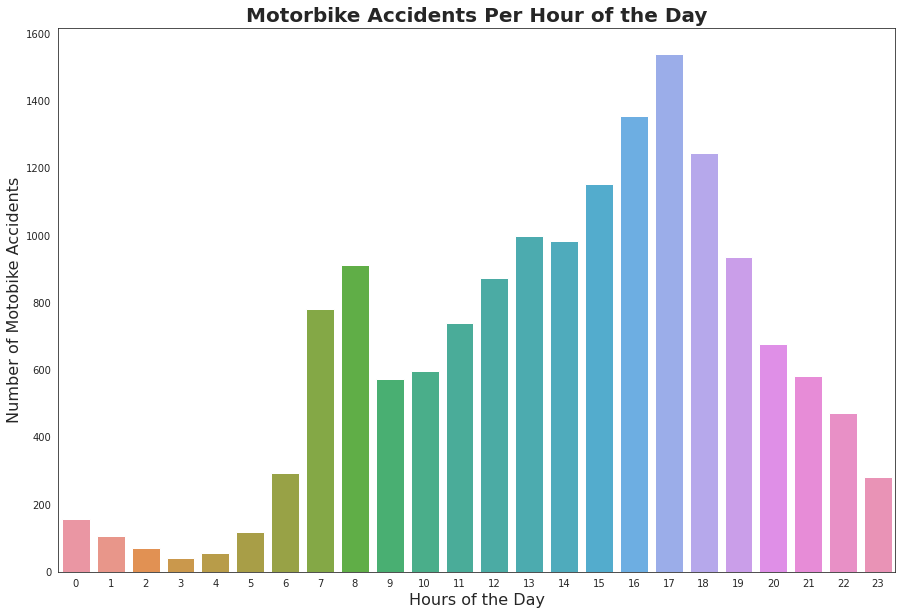

In [73]:
%matplotlib inline
plt.figure(figsize=(15,10))
sns.set_style('white')
sns.barplot(grouped_mbike['Hour'], grouped_mbike['Count'])
plt.title("Motorbike Accidents Per Hour of the Day",fontsize=20,fontweight="bold")
plt.xlabel("Hours of the Day", fontsize=16)
plt.ylabel("Number of Motobike Accidents", fontsize=16)
plt.show()

In [74]:
grouped_mbike2 = Motorbike_data[['Vehicle_Type',	'Day_of_Week']].groupby(['Day_of_Week']).size().reset_index()
grouped_mbike2.columns = ['Day_of_Week', 'Count']
grouped_mbike2

,Day_of_Week,Count
0,Friday,2499
1,Monday,2046
2,Saturday,2078
3,Sunday,1969
4,Thursday,2351
5,Tuesday,2275
6,Wednesday,2328


In [75]:
cats_dayorder = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
grouped_mbike2_weekday = grouped_mbike2.groupby(['Day_of_Week']).sum().reindex(cats_dayorder) 
grouped_mbike2_weekday

,Count
Day_of_Week,
Sunday,1969
Monday,2046
Tuesday,2275
Wednesday,2328
Thursday,2351
Friday,2499
Saturday,2078


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Motorbike Accidents Per Day of the Week')

Text(0.5, 0, 'Days of the Week')

Text(0, 0.5, 'Number of Motorbike Accidents')

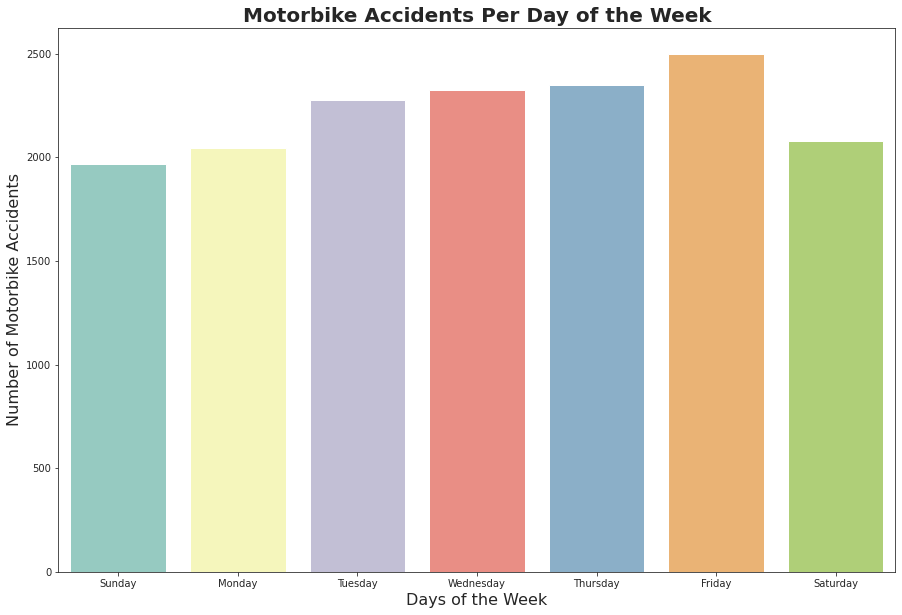

In [77]:
%matplotlib inline
plt.figure(figsize=(15,10))
sns.set_style('ticks')
sns.barplot(grouped_mbike2_weekday.index, grouped_mbike2_weekday['Count'])
plt.title("Motorbike Accidents Per Day of the Week",fontsize=20,fontweight="bold")
plt.xlabel("Days of the Week", fontsize=16)
plt.ylabel("Number of Motorbike Accidents", fontsize=16)
plt.show()

## Question C1
##### For pedestrians involved in accidents, are there significant hours of the day on which they are more likely to be involved?

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Pedestrian Accidents Per Hour of the Day')

Text(0.5, 0, 'Hours of the Day')

Text(0, 0.5, 'Number of Accidents Involving Pedestrians')

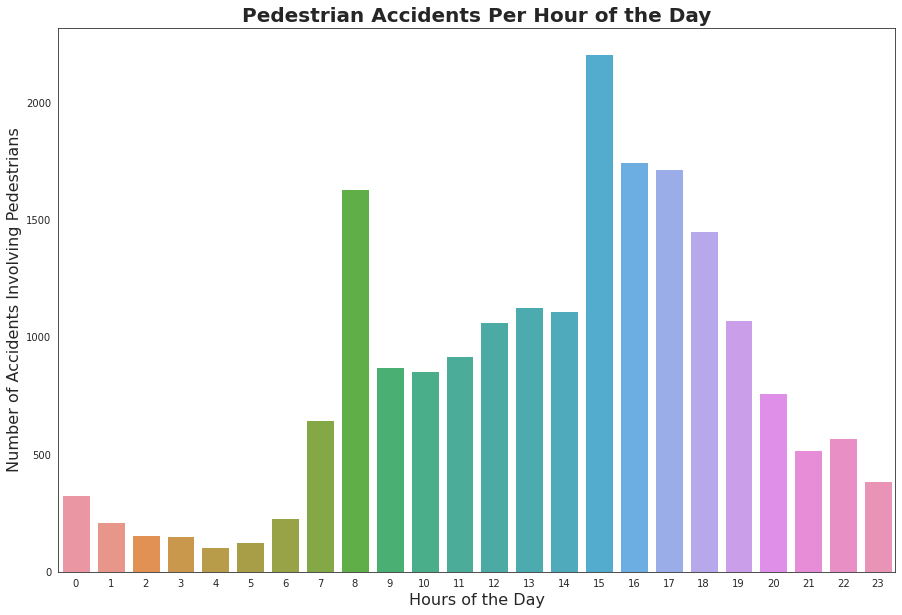

In [80]:
pedestrian_df = df1[(df1['Casualty_Type']==0)]
ped_df = pedestrian_df[['Casualty_Type', 'Hour', 'Day_of_Week']]
grouped_ped = ped_df[['Casualty_Type',	'Hour']].groupby(['Hour']).size().reset_index()
grouped_ped.columns = ['Hour', 'Count']

%matplotlib inline
plt.figure(figsize=(15,10))
sns.set_style('white')
sns.barplot(grouped_ped['Hour'], grouped_ped['Count'])
plt.title("Pedestrian Accidents Per Hour of the Day",fontsize=20,fontweight="bold")
plt.xlabel("Hours of the Day", fontsize=16)
plt.ylabel("Number of Accidents Involving Pedestrians", fontsize=16)
plt.show()

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Pedestrian Accidents per Day of the Week')

Text(0.5, 0, 'Day of the week')

Text(0, 0.5, 'Number of Accidents Involving Pedestrians')

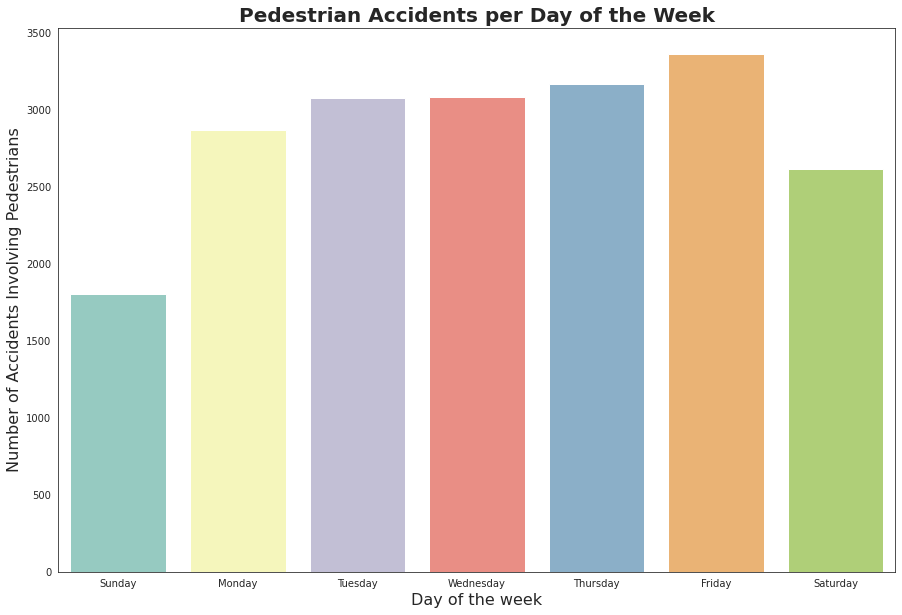

In [85]:
grouped_ped1 = ped_df[['Casualty_Type',	'Day_of_Week']].groupby(['Day_of_Week']).size().reset_index()
grouped_ped1.columns = ['Day_of_Week', 'Count']

cats_dayorder = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
grouped_ped1_weekday = grouped_ped1.groupby(['Day_of_Week']).sum().reindex(cats_dayorder) 

%matplotlib inline
plt.figure(figsize=(15,10))
sns.set_style('white')
sns.barplot(grouped_ped1_weekday.index, grouped_ped1_weekday['Count'])
plt.title("Pedestrian Accidents per Day of the Week",fontsize=20,fontweight="bold")
plt.xlabel("Day of the week", fontsize=16)
plt.ylabel("Number of Accidents Involving Pedestrians", fontsize=16)
plt.show()

## Question D
##### What impact, if any, does daylight savings have on road traffic accidents in the week after it starts and stops?

In [82]:
df1

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Month,Day,Day_no,Hour,Minute,Daily_Time_Periods,Veh_match
0,2019010155191,-0.124193,51.526795,1,3,2,1,2019-01-01,Tuesday,01:50,...,3.0,1.0,3.0,1,1,1,1,50,Night,Nil
1,2019010155192,-0.191044,51.546387,1,2,1,1,2019-01-01,Tuesday,01:20,...,3.0,1.0,3.0,1,1,1,1,20,Night,Nil
2,2019010155194,-0.200064,51.541121,1,3,2,2,2019-01-01,Tuesday,00:40,...,3.0,1.0,3.0,1,1,1,0,40,Night,Nil
3,2019010155194,-0.200064,51.541121,1,3,2,2,2019-01-01,Tuesday,00:40,...,3.0,1.0,3.0,1,1,1,0,40,Night,Nil
4,2019010155195,0.020461,51.548879,1,3,2,3,2019-01-01,Tuesday,02:45,...,4.0,1.0,4.0,1,1,1,2,45,Night,Nil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141262,2019984106919,-3.368899,55.047323,98,3,1,1,2019-05-18,Saturday,01:00,...,6.0,3.0,6.0,5,18,138,1,0,Night,Nil
141263,2019984107019,-2.983499,55.215407,98,3,4,1,2019-05-30,Thursday,08:46,...,1.0,1.0,1.0,5,30,150,8,46,Morning Hours,Nil
141264,2019984107219,-3.274645,54.991685,98,3,2,1,2019-06-21,Friday,15:30,...,7.0,3.0,7.0,6,21,172,15,30,Afternoon Rush,Nil
141265,2019984107419,-2.997491,55.148292,98,3,1,1,2019-06-29,Saturday,14:10,...,8.0,3.0,8.0,6,29,180,14,10,Office Hours,Nil


In [83]:
#Creating a list of days within the 2019 period of day light savings and saving it as the variable name, dls.
dls = []
dls_start_month = 3
dls_start_day = 90
dls_end_month = 10
dls_end_day = 300

for d_no in df1['Day_no']:
  if (d_no >= dls_start_day) and (d_no <= dls_end_day):
    dls.append(1)
  else:
    dls.append(0)

In [86]:
#Convert dls list to series and concatenate to df1 with the column name dst_indicator
dls_ser = pd.Series(dls, name = 'dst_indicator')
df1 = pd.concat([df1, dls_ser], axis =1)
df1

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Driver_Home_Area_Type,Vehicle_IMD_Decile,Month,Day,Day_no,Hour,Minute,Daily_Time_Periods,Veh_match,dst_indicator
0,2019010155191,-0.124193,51.526795,1,3,2,1,2019-01-01,Tuesday,01:50,...,1.0,3.0,1,1,1,1,50,Night,Nil,0
1,2019010155192,-0.191044,51.546387,1,2,1,1,2019-01-01,Tuesday,01:20,...,1.0,3.0,1,1,1,1,20,Night,Nil,0
2,2019010155194,-0.200064,51.541121,1,3,2,2,2019-01-01,Tuesday,00:40,...,1.0,3.0,1,1,1,0,40,Night,Nil,0
3,2019010155194,-0.200064,51.541121,1,3,2,2,2019-01-01,Tuesday,00:40,...,1.0,3.0,1,1,1,0,40,Night,Nil,0
4,2019010155195,0.020461,51.548879,1,3,2,3,2019-01-01,Tuesday,02:45,...,1.0,4.0,1,1,1,2,45,Night,Nil,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141262,2019984106919,-3.368899,55.047323,98,3,1,1,2019-05-18,Saturday,01:00,...,3.0,6.0,5,18,138,1,0,Night,Nil,1
141263,2019984107019,-2.983499,55.215407,98,3,4,1,2019-05-30,Thursday,08:46,...,1.0,1.0,5,30,150,8,46,Morning Hours,Nil,1
141264,2019984107219,-3.274645,54.991685,98,3,2,1,2019-06-21,Friday,15:30,...,3.0,7.0,6,21,172,15,30,Afternoon Rush,Nil,1
141265,2019984107419,-2.997491,55.148292,98,3,1,1,2019-06-29,Saturday,14:10,...,3.0,8.0,6,29,180,14,10,Office Hours,Nil,1


In [87]:
#Creating dataframes of items during and outside day light savings periods
dst = df1[(df1['dst_indicator'] == 1)]
non_dst = df1[(df1['dst_indicator'] == 0)]

In [88]:
#Grouping the columns 'Day_no' and 'Hour' during the day light savings period
dst_df = dst[['Day_no', 'Hour']].groupby(['Day_no', 'Hour']).size().reset_index()
dst_df.columns = ['Day_no', 'Hour', 'Count'] 
dst_df

,Day_no,Hour,Count
0,90,0,7
1,90,2,12
2,90,3,2
3,90,4,4
4,90,5,8
...,...,...,...
4887,300,19,20
4888,300,20,10
4889,300,21,16
4890,300,22,10


In [89]:
#Grouping the columns 'Day_no' and 'Hour' during the period outside day light savings
non_dst = non_dst[['Day_no', 'Hour']].groupby(['Day_no', 'Hour']).size().reset_index()
non_dst.columns = ['Day_no', 'Hour', 'Count'] 
non_dst

,Day_no,Hour,Count
0,1,0,12
1,1,1,16
2,1,2,13
3,1,3,14
4,1,4,13
...,...,...,...
3566,365,19,35
3567,365,20,17
3568,365,21,16
3569,365,22,10


## Analysing Impact of Day Light Savings on Accidents in The Week After it Starts

In [90]:
wk1_dst = dst_df[(dst_df['Day_no']>=90) & (dst_df['Day_no']<97)]
wk1_dst['Count'].sum()

2478

In [91]:
wk_b4_dst = non_dst[(non_dst['Day_no']>=83) & (non_dst['Day_no']<90)]
wk_b4_dst['Count'].sum()

2740

In [92]:
dst_week1 = df1.loc[df1['Day_no'].between(90, 96)]
dst_wk1_count = dst_week1['Hour'].value_counts().sort_index()
dst_wk1_count.sum()

2478

In [93]:
week_b4_dst = df1.loc[df1['Day_no'].between(83, 89)]
week_b4_count = week_b4_dst['Hour'].value_counts().sort_index()
week_b4_count.sum()

2740

In [94]:
dst_wk1_count

0      24
1      23
2      27
3       9
4      14
5      32
6      45
7     108
8     175
9     104
10    108
11    108
12    152
13    157
14    176
15    210
16    208
17    246
18    173
19    120
20     70
21     70
22     77
23     42
Name: Hour, dtype: int64

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Accidents in week 1 of dls')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, '\nHour')

Text(0, 0.5, '\nNumber of Accidents')

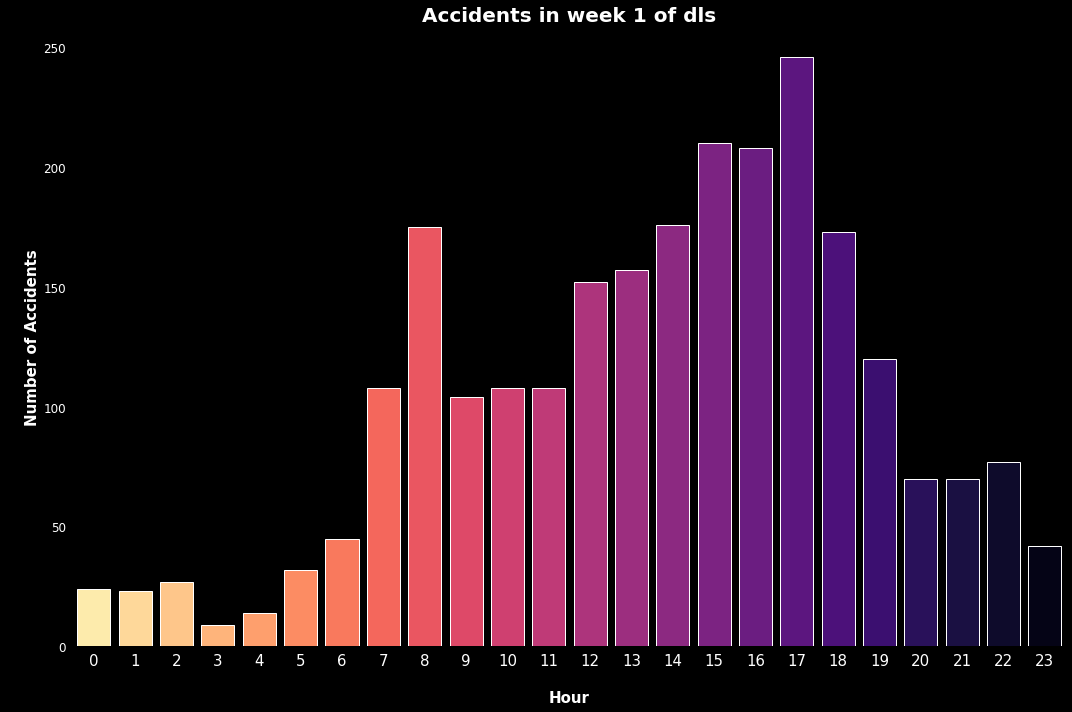

In [95]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(dst_wk1_count.index,dst_wk1_count, 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents in week 1 of dls",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nHour", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Accidents in week before dls')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, '\nHour')

Text(0, 0.5, '\nNumber of Accidents')

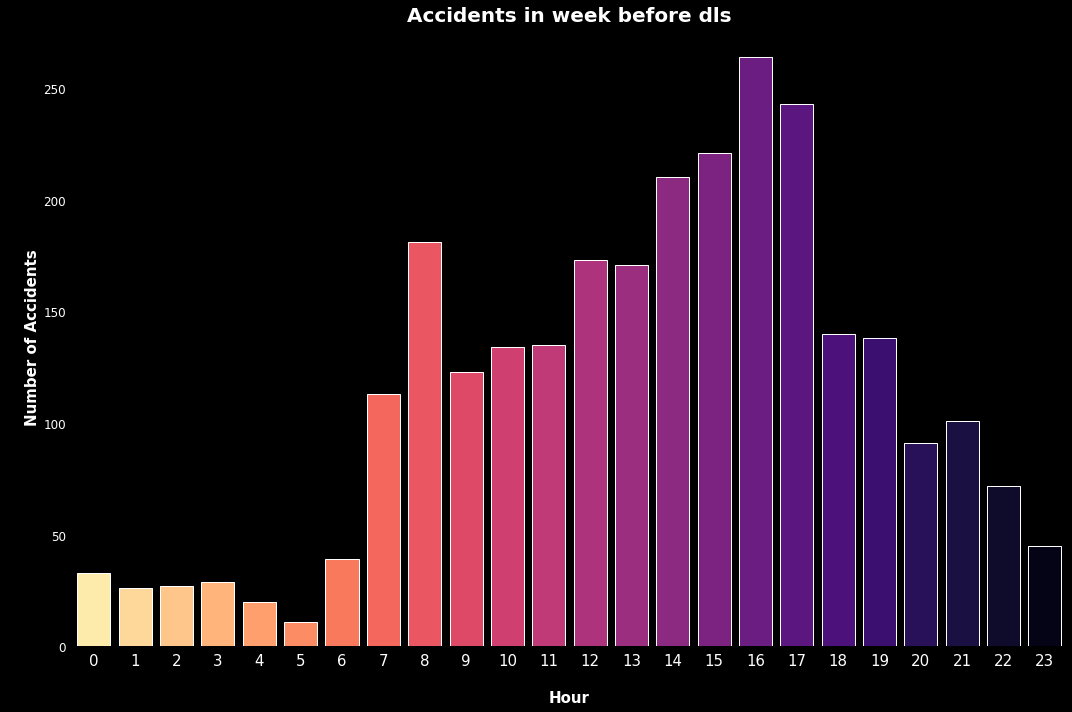

In [96]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(week_b4_count.index,week_b4_count, 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents in week before dls",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nHour", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Difference between Accidents in week before and after dls start')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

(array([-80., -60., -40., -20.,   0.,  20.,  40.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, '\nHour')

Text(0, 0.5, '\nNumber of Accidents')

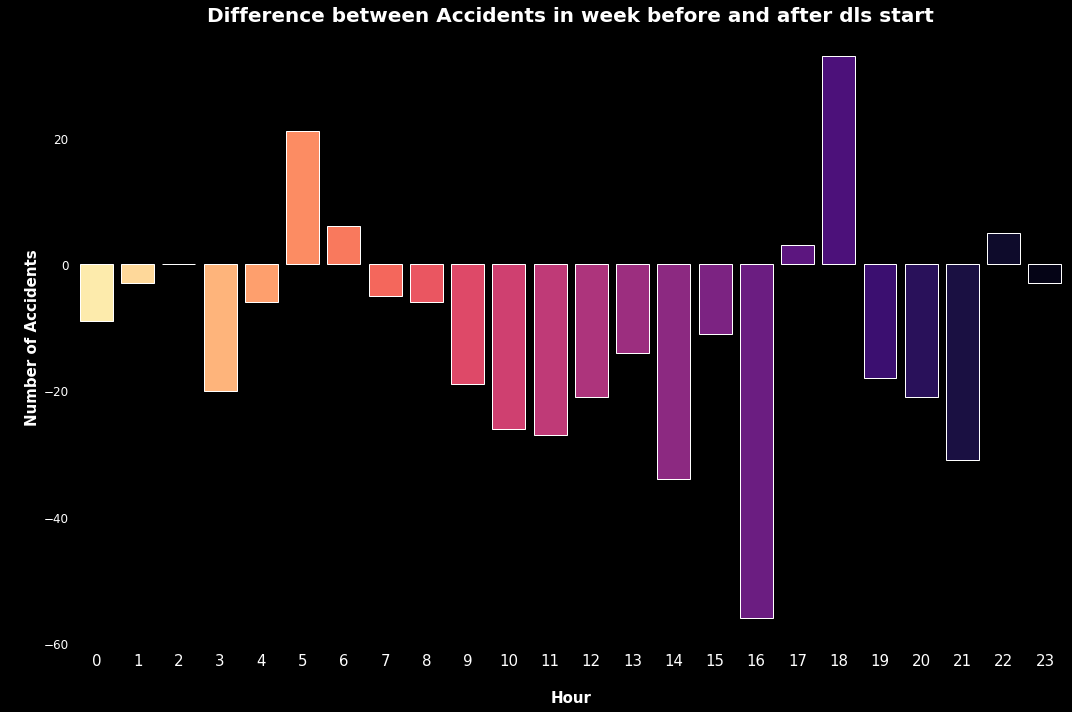

In [97]:
diff = dst_wk1_count - week_b4_count

plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(diff.index,diff, 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Difference between Accidents in week before and after dls start",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nHour", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()

##### It can be visualy observed from the plot above that the in general, the occurrence of accidents in the week when day light savings started had become fewer than in the week before it began.

##### This observation shall however be supported by statistics. 

### Hypothesis Testing: Pooled Variance Test
####Null Hypothesis(H0): 
#####Daylight savings had no impact on road traffic accidents in the week after it starts
#### Alternative Hypothesis(H1):
#####Daylight savings had an impact on road traffic accidents in the week after it starts

In [98]:
#Taking the difference in mean as of the count of accidents before and after the start of day light savings as H0
h0 = week_b4_count.mean() - dst_wk1_count.mean()

#Taking the standard deviation of the count of accidents in the week before the start of day light savings
wb_std = week_b4_count.std()

#Taking the standard deviation of the count of accidents in the week after the start of day light savings
wk1_std = dst_wk1_count.std()

#The square root of the pooled standard deviations of the two weeks(Pooled Variance)
pooled_std = (wb_std**2 + wk1_std**2)**0.5

In [99]:
# if at significance of 0.01 (2 std)
# if h0 > 2*pooled_std
h0 > (2*pooled_std)

False

In [100]:
# if at significance of 0.05 (3 std)
# if h0 > 3*pooled_std
h0 > (3*pooled_std)

False

## I am rejecting null hypothesis

## Analysing the impact of day light savings on road traffic accident in the week after it stops

In [101]:
last_wk_dst = dst_df[(dst_df['Day_no']>=294) & (dst_df['Day_no']<301)]
last_wk_dst['Count'].sum()

2627

In [102]:
wk1_non_dst = non_dst[(non_dst['Day_no']>=301) & (non_dst['Day_no']<308)]
wk1_non_dst['Count'].sum()

2733

In [103]:
last_week_dst = df1.loc[df1['Day_no'].between(294, 300)]
last_week_dst_count = last_week_dst['Hour'].value_counts().sort_index()
last_week_dst_count.sum()

2627

In [104]:
week1_non_dst = df1.loc[df1['Day_no'].between(301, 307)]
week1_non_dst_count = week1_non_dst['Hour'].value_counts().sort_index()
week1_non_dst_count.sum()

2733

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Accidents in week after dls ending')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, '\nHour')

Text(0, 0.5, '\nNumber of Accidents')

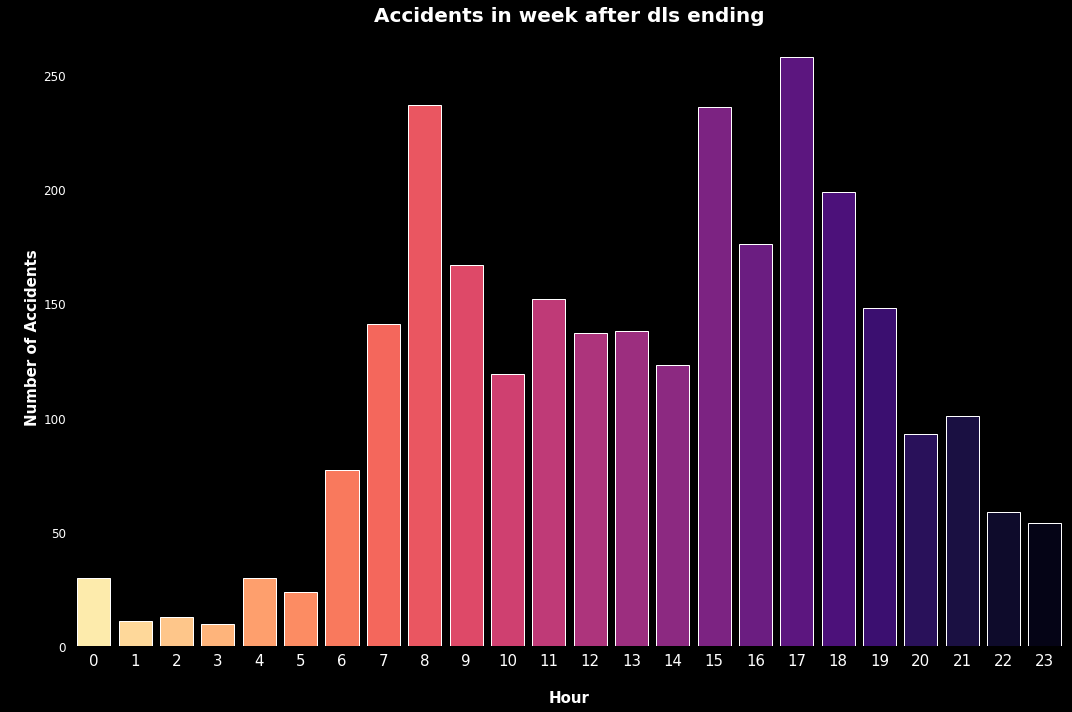

In [106]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(week1_non_dst_count.index,week1_non_dst_count, 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents in week after dls ending",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nHour", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Accidents in last week of dls')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 0, '\nHour')

Text(0, 0.5, '\nNumber of Accidents')

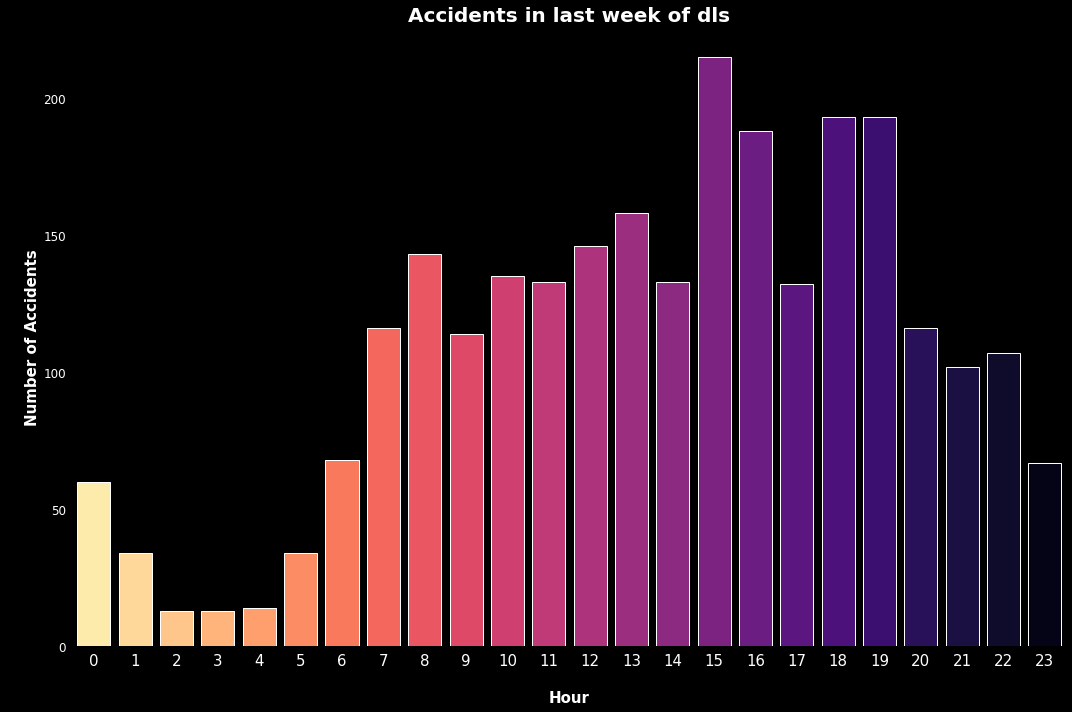

In [107]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(last_week_dst_count.index,last_week_dst_count, 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents in last week of dls",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nHour", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Difference between Accidents in week before and after dls end')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

(array([-75., -50., -25.,   0.,  25.,  50.,  75., 100., 125., 150.]),
 <a list of 10 Text major ticklabel objects>)

Text(0.5, 0, '\nHour')

Text(0, 0.5, '\nNumber of Accidents')

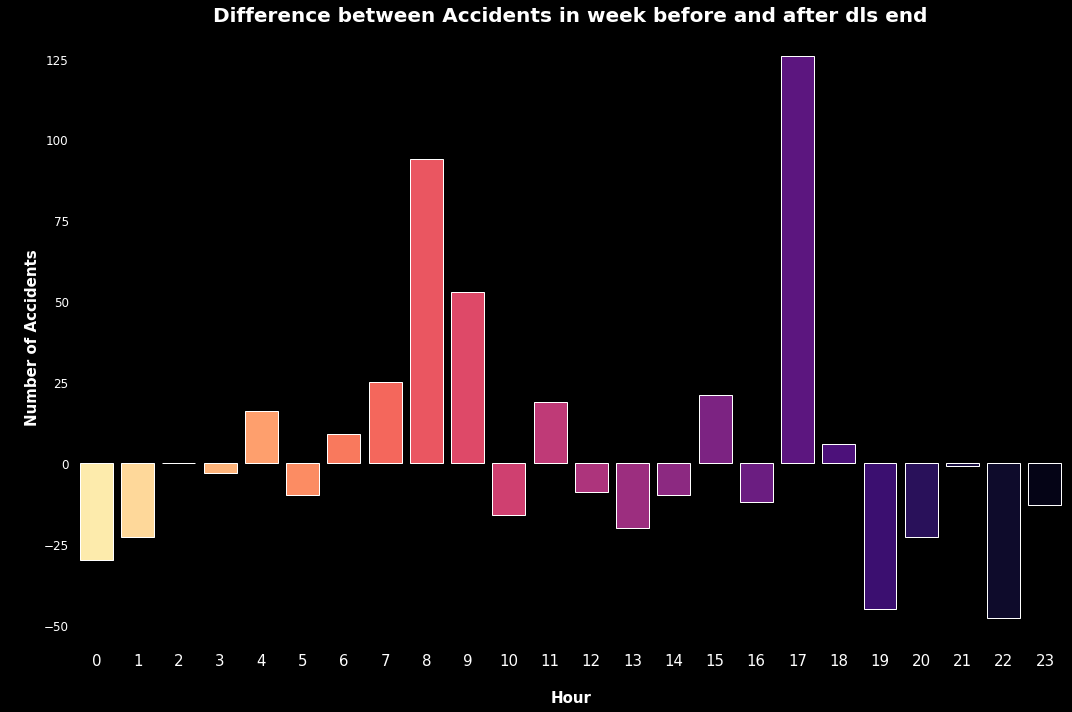

In [108]:
diff = week1_non_dst_count - last_week_dst_count

plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(diff.index,diff, 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Difference between Accidents in week before and after dls end",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("\nHour", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()

##### It can be visualy observed from the plot above that the in general, the occurrence of accidents in the week when day light savings ended had become more than in the week before it ended.

##### This observation shall however be supported by statistics. 

### Hypothesis Testing: Pooled Variance Test
####Null Hypothesis(H0): 
#####End of daylight savings had no impact on road traffic accidents
#### Alternative Hypothesis(H1):
#####End of daylight savings had an impact on road traffic accidents

In [109]:
#Taking the difference in mean as of the count of accidents before and after the end of day light savings as H0
h0 = week1_non_dst_count.mean() - last_week_dst_count.mean()

#Taking the standard deviation of the count of accidents in the week before the end of day light savings
w1nd_std = week1_non_dst_count.std()

#Taking the standard deviation of the count of accidents in the week after the end of day light savings
lwd_std = last_week_dst_count.std()

#The square root of the pooled standard deviations of the two weeks(Pooled Variance)
pooled_std = (w1nd_std**2 + lwd_std**2)**0.5

In [110]:
# if at significance of 0.01 (2 std)
# if h0 > 2*pooled_std
h0 > (2*pooled_std)

False

In [111]:
# if at significance of 0.01 (3 std)
# if h0 > 3*pooled_std
h0 > (3*pooled_std)

False

## I am rejecting null hypothesis

## Question E
##### What impact, if any, does sunrise and sunset times have on road traffic accidents?

In [112]:
feb=df1[(df1['Month']==2)]
feb['Day_no'].value_counts().sort_index()

32    237
33    360
34    370
35    389
36    385
37    298
38    365
39    451
40    400
41    519
42    398
43    518
44    366
45    446
46    454
47    341
48    301
49    345
50    366
51    362
52    400
53    377
54    415
55    371
56    425
57    416
58    420
59    359
Name: Day_no, dtype: int64

In [113]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [114]:
df1['Converted_time'] = pd.DatetimeIndex(df1['Time'])
df1['hour'] = df1['Converted_time'].dt.hour

In [115]:
feb_start_date = '2019-02-01'
feb_end_date = '2019-02-28'

rise_set_df = df1[(df1['Date']>=feb_start_date) & (df1['Date']<=feb_end_date)]

In [116]:
sunrise = rise_set_df['Date'].groupby(rise_set_df['hour'].isin([8,9])).value_counts()
sunrise = sunrise.loc[1].sort_index()
sunrise = pd.DataFrame(sunrise)
sunrise.columns = ['sunrise_count']

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'February accidents during sunrise')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 0, '\nDate')

Text(0, 0.5, '\nNumber of Accidents')

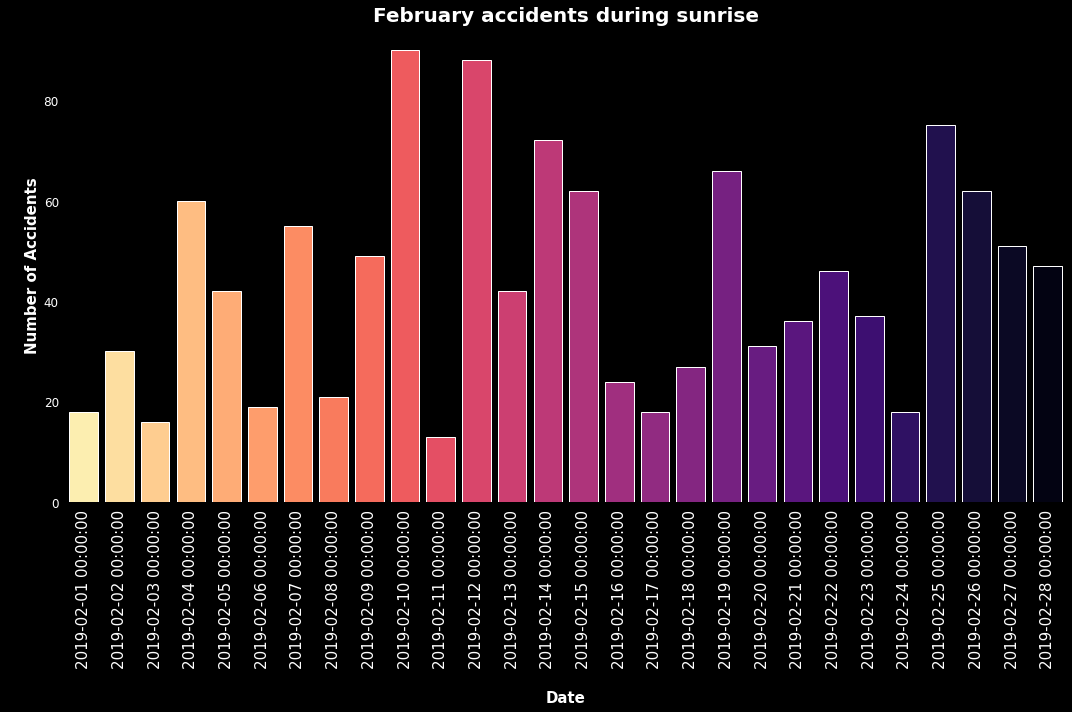

In [117]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(sunrise.index,sunrise['sunrise_count'], 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("February accidents during sunrise",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("\nDate", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()

In [118]:
sunset = rise_set_df['Date'].groupby(rise_set_df['hour'].isin([17,18])).value_counts()
sunset = sunset.loc[1].sort_index()
sunset = pd.DataFrame(sunset)
sunset.columns = ['sunset_count']

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'February accidents during sunset')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

Text(0.5, 0, '\nDate')

Text(0, 0.5, '\nNumber of Accidents')

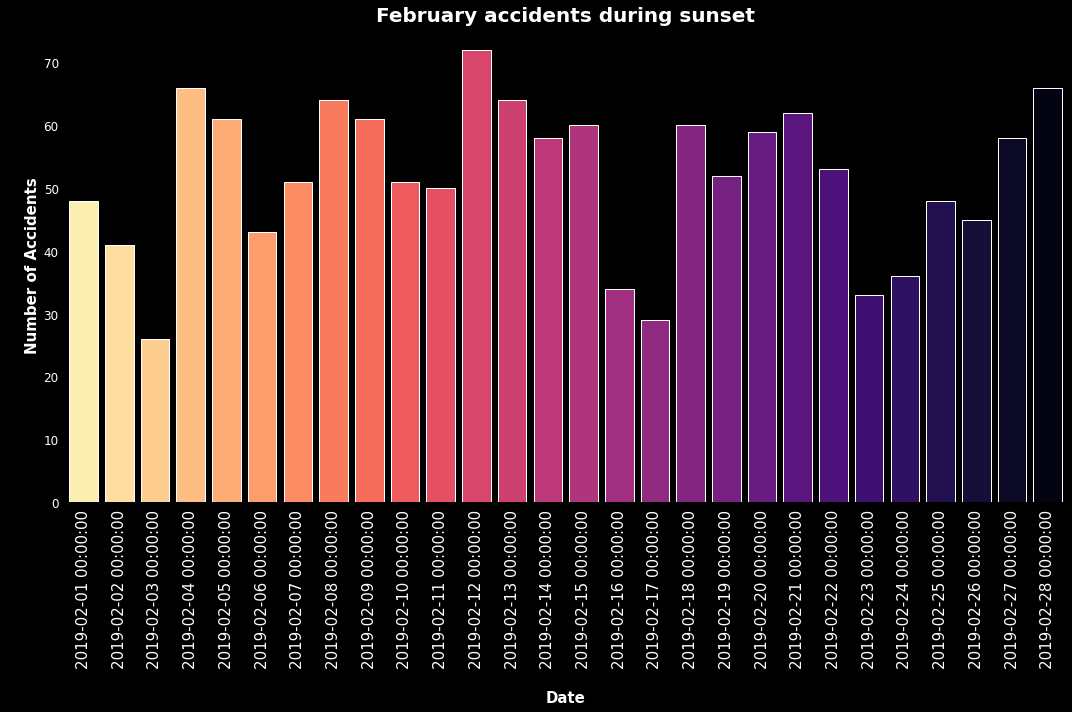

In [119]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(sunset.index,sunset['sunset_count'], 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("February accidents during sunset",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("\nDate", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()

In [120]:
rise_set_count = pd.concat([sunrise, sunset], axis = 1)
rise_set_count

,sunrise_count,sunset_count
Date,,
2019-02-01,18,48
2019-02-02,30,41
2019-02-03,16,26
2019-02-04,60,66
2019-02-05,42,61
2019-02-06,19,43
2019-02-07,55,51
2019-02-08,21,64
2019-02-09,49,61


In [121]:
rise_set_count.columns

Index(['sunrise_count', 'sunset_count'], dtype='object')

In [122]:
b4_sunrise = rise_set_df['Date'].groupby(rise_set_df['hour'].isin([6,7])).value_counts()
b4_sunrise = b4_sunrise.loc[1].sort_index()
b4_sunrise = pd.DataFrame(b4_sunrise)
b4_sunrise.columns = ['b4_sunrise_count']

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'February accidents before sunrise')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, '\nDate')

Text(0, 0.5, '\nNumber of Accidents')

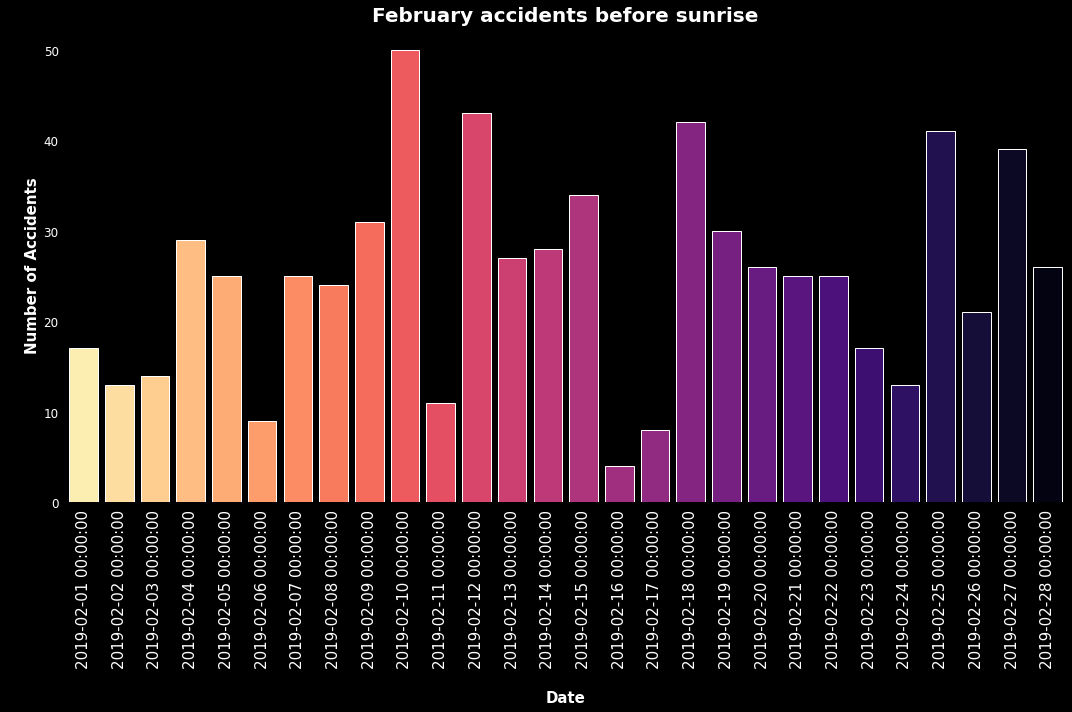

In [123]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(b4_sunrise.index,b4_sunrise['b4_sunrise_count'], 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("February accidents before sunrise",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("\nDate", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()

In [124]:
b4_sunset = rise_set_df['Date'].groupby(rise_set_df['hour'].isin([15,16])).value_counts()
b4_sunset = b4_sunset.loc[1].sort_index()
b4_sunset = pd.DataFrame(b4_sunset)
b4_sunset.columns = ['b4_sunset_count']

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'February accidents before sunset')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

Text(0.5, 0, '\nDate')

Text(0, 0.5, '\nNumber of Accidents')

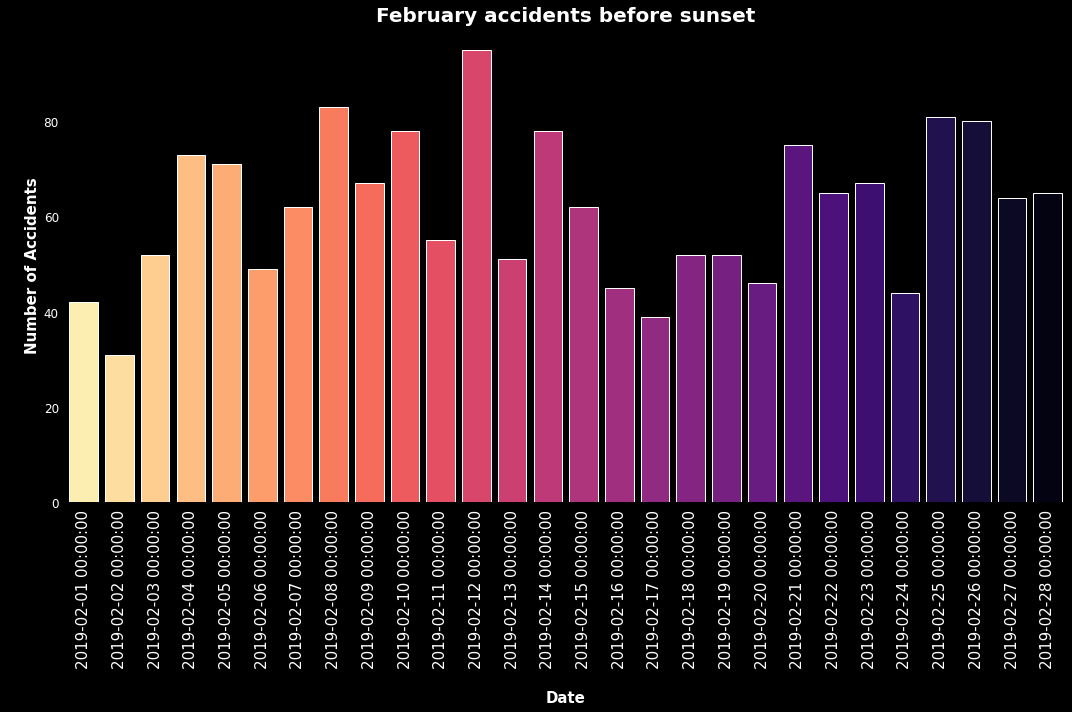

In [125]:
plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(b4_sunset.index,b4_sunset['b4_sunset_count'], 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("February accidents before sunset",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("\nDate", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Difference between accidents before and after sunrise')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

(array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 8 Text major ticklabel objects>)

Text(0.5, 0, '\nHour')

Text(0, 0.5, '\nNumber of Accidents')

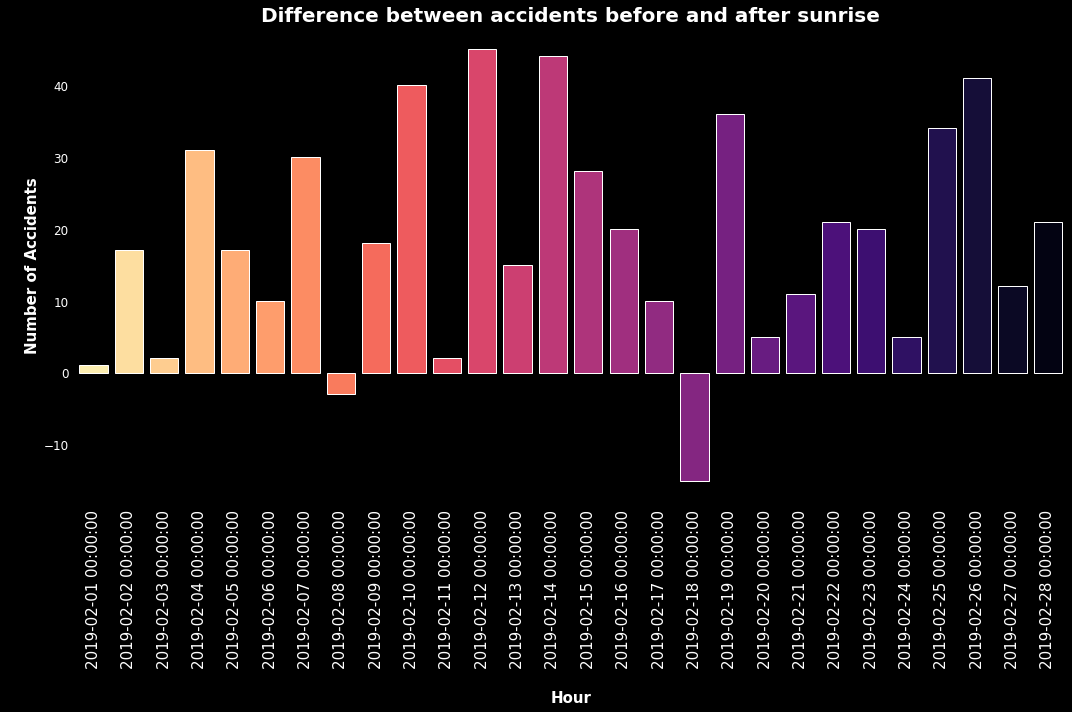

In [126]:
diff = sunrise['sunrise_count'] - b4_sunrise['b4_sunrise_count']

plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(diff.index,diff, 
            saturation=1, palette='magma_r')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Difference between accidents before and after sunrise",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("\nHour", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Difference between Accidents before and after sunset')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

(array([-40., -30., -20., -10.,   0.,  10.,  20.]),
 <a list of 7 Text major ticklabel objects>)

Text(0.5, 0, '\nHour')

Text(0, 0.5, '\nNumber of Accidents')

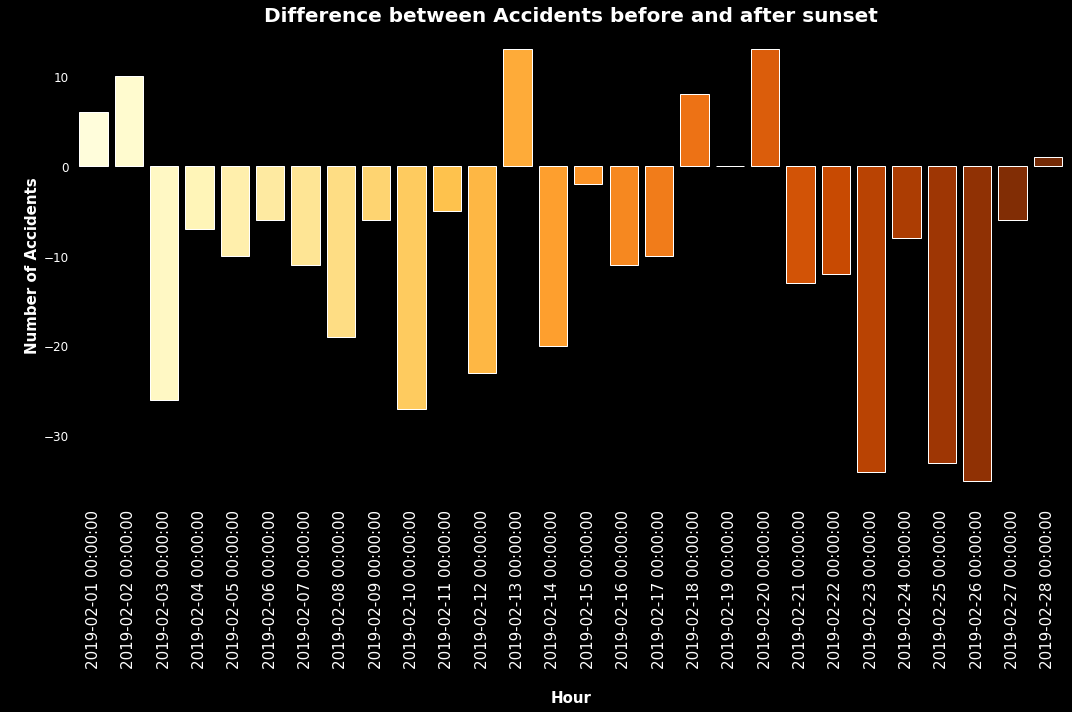

In [127]:
diff = sunset['sunset_count'] - b4_sunset['b4_sunset_count']

plt.style.use('dark_background')
plt.figure(figsize=(15,10))

sns.barplot(diff.index,diff, 
            saturation=1, palette='YlOrBr')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Difference between Accidents before and after sunset",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=12)
plt.xlabel("\nHour", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()

## Question F
##### Are there particular types of vehicles (engine capacity, age of vehicle, etc.) that are more frequently involved in road traffic accidents?

In [128]:
#Creating a dataframe of engine capacity and age
df_age_capacity = df1[['Engine_Capacity_(CC)', 'Age_of_Vehicle']]
df_age_capacity

,Engine_Capacity_(CC),Age_of_Vehicle
0,1560.0,8.0
1,1560.0,8.0
2,1560.0,8.0
3,1560.0,8.0
4,1560.0,8.0
...,...,...
141262,1997.0,14.0
141263,2143.0,1.0
141264,2967.0,5.0
141265,1597.0,6.0


In [129]:
kmeans=KMeans(n_clusters=16)
kmeans.fit(df_age_capacity)

KMeans(n_clusters=16)

In [130]:
labels=kmeans.predict(df_age_capacity)
centroids = kmeans.cluster_centers_
labels

array([ 5,  5,  5, ...,  8,  5, 10], dtype=int32)

In [131]:
centroids

array([[2.25766946e+03, 8.55408583e+00],
       [1.21995165e+03, 8.82863107e+00],
       [9.08452248e+03, 9.72093023e+00],
       [4.35535298e+03, 7.19578947e+00],
       [1.24591101e+02, 6.44978871e+00],
       [1.56979423e+03, 8.02509387e+00],
       [1.26894923e+04, 6.07692308e+00],
       [6.88041111e+03, 8.17129630e+00],
       [2.99667652e+03, 8.89473684e+00],
       [1.94125844e+03, 8.85303858e+00],
       [6.40941332e+02, 1.21299304e+01],
       [2.99800000e+04, 1.10000000e+01],
       [1.39082434e+03, 8.76711850e+00],
       [5.23609381e+03, 5.49906191e+00],
       [1.08345098e+04, 4.92810458e+00],
       [9.90767085e+02, 7.31266203e+00]])

Text(0.5, 0, 'Engine capacity CC')

Text(0, 0.5, 'Age of vehicle')

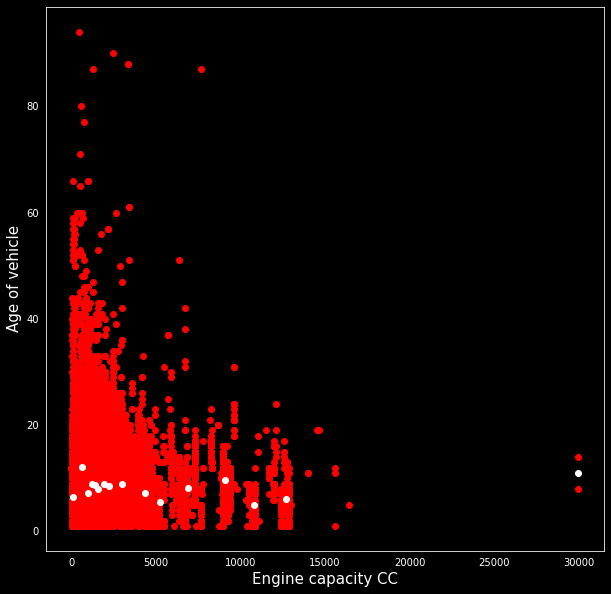

In [132]:
fig = plt.figure(figsize=(10, 10))
colors = map(lambda x: colmap[x+1], labels)
plt.xlabel('Engine capacity CC', fontdict = {'fontsize' : 15})
plt.ylabel('Age of vehicle', fontdict = {'fontsize' : 15})
plt.scatter(df_age_capacity['Engine_Capacity_(CC)'], df_age_capacity['Age_of_Vehicle'], color="red")
plt.scatter(centroids[:,0], centroids[:,1], color="white")
plt.show()

## Question G
##### Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?

In [133]:
drive_conditions = df1[['Speed_limit','Weather_Conditions']]
drive_conditions

,Speed_limit,Weather_Conditions
0,30.0,1
1,20.0,1
2,30.0,1
3,30.0,1
4,30.0,1
...,...,...
141262,60.0,1
141263,60.0,1
141264,60.0,1
141265,30.0,1


In [134]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(drive_conditions)

KMeans(n_clusters=5)

In [135]:
labels = kmeans.predict(drive_conditions)
centroids = kmeans.cluster_centers_
labels
centroids

array([1, 4, 1, ..., 3, 1, 3], dtype=int32)

array([[70.        ,  1.52394881],
       [30.        ,  1.54831941],
       [43.316428  ,  1.5011436 ],
       [60.        ,  1.59740078],
       [20.        ,  1.55174693]])

Text(0.5, 0, 'Speed Limits')

Text(0, 0.5, 'Weather Conditions')

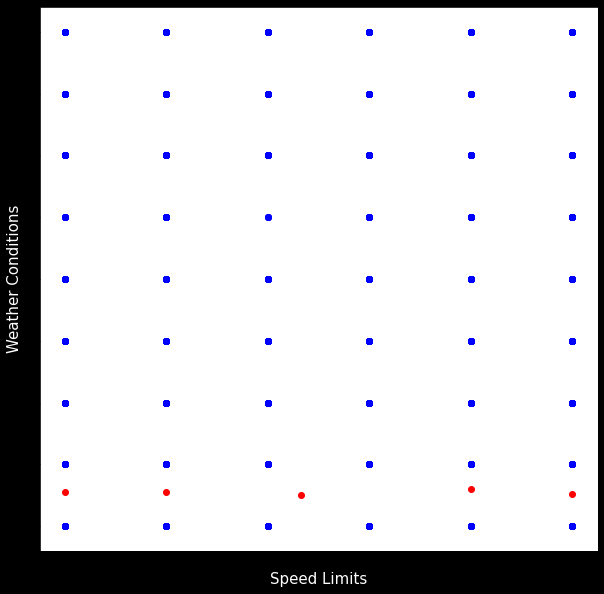

In [136]:
fig = plt.figure(figsize=(10, 10))
plt.style.use('default')
colors = map(lambda x: colmap[x+1], labels)
plt.scatter(drive_conditions['Speed_limit'], drive_conditions['Weather_Conditions'], color="blue")
plt.scatter(centroids[:,0], centroids[:,1], color="red")
plt.xlabel('Speed Limits',fontdict = {'fontsize' : 15}, color = 'white')
plt.ylabel('Weather Conditions', fontdict = {'fontsize' : 15}, color = 'white')
plt.show()

In [137]:
df_coord = df1[['Longitude', 'Latitude']]
df_coord

,Longitude,Latitude
0,-0.124193,51.526795
1,-0.191044,51.546387
2,-0.200064,51.541121
3,-0.200064,51.541121
4,0.020461,51.548879
...,...,...
141262,-3.368899,55.047323
141263,-2.983499,55.215407
141264,-3.274645,54.991685
141265,-2.997491,55.148292


In [138]:
kmeans=KMeans(n_clusters=25)
kmeans.fit(df_coord)

KMeans(n_clusters=25)

In [139]:
labels = kmeans.predict(df_coord)
centroids = kmeans.cluster_centers_
labels
centroids

array([ 4,  4,  4, ..., 21, 21, 17], dtype=int32)

array([[-1.91498884e+00,  5.24761114e+01],
       [ 1.42152035e-02,  5.25414593e+01],
       [-3.20758933e+00,  5.60237117e+01],
       [-3.35814781e+00,  5.16746367e+01],
       [-1.04474255e-01,  5.15283788e+01],
       [-1.48535386e+00,  5.36766541e+01],
       [-2.92770966e+00,  5.34290104e+01],
       [-1.42323886e+00,  5.09350063e+01],
       [-5.04586224e+00,  5.03119747e+01],
       [-4.03288865e-01,  5.36204464e+01],
       [-1.52577738e+00,  5.48326231e+01],
       [-2.29569801e+00,  5.34865450e+01],
       [-1.21590036e+00,  5.29014681e+01],
       [-4.79049428e+00,  5.73495257e+01],
       [-3.86771088e+00,  5.06182217e+01],
       [-4.36840524e-01,  5.11533945e+01],
       [-7.93530202e-01,  5.19274976e+01],
       [-4.31131893e+00,  5.58185205e+01],
       [ 1.16336941e+00,  5.23246096e+01],
       [ 6.34794652e-01,  5.13105390e+01],
       [-2.79876463e+00,  5.10011158e+01],
       [-3.03819270e+00,  5.44946401e+01],
       [-2.32354977e+00,  5.15789412e+01],
       [-4.

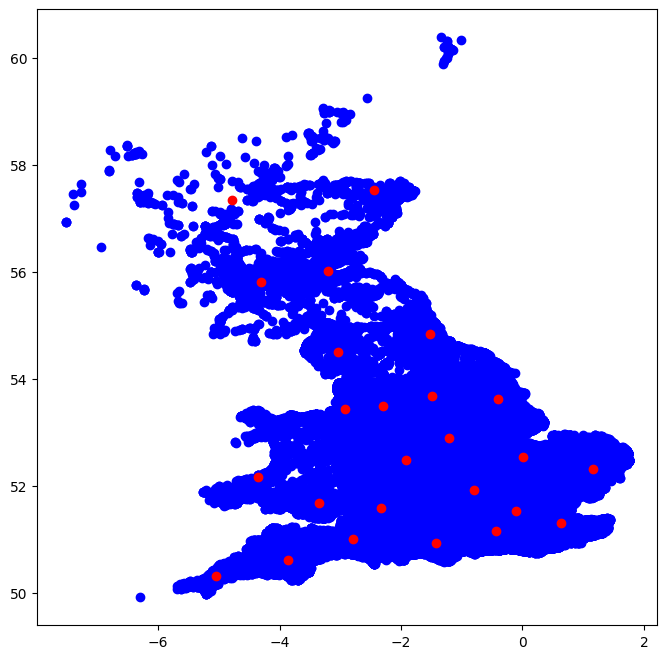

In [141]:
fig = plt.figure(figsize=(8, 8))
colors = map(lambda x: colmap[x+1], labels)
plt.scatter(df_coord["Longitude"], df_coord["Latitude"], color="blue")
plt.scatter(centroids[:,0], centroids[:, 1], color="red")
plt.show()

In [142]:
kmeans.inertia_

16972.230725360692

In [143]:
sev = pd.get_dummies(df1.Accident_Severity, prefix='Severity')
speed_lim = pd.get_dummies(df1.Speed_limit, prefix='Speed Limit')
weather_con = pd.get_dummies(df1.Weather_Conditions, prefix='Weather Conditions')

In [144]:
union_list = [sev, speed_lim, weather_con]
union = pd.concat(union_list,axis=1)
union

,Severity_1,Severity_2,Severity_3,Speed Limit_20.0,Speed Limit_30.0,Speed Limit_40.0,Speed Limit_50.0,Speed Limit_60.0,Speed Limit_70.0,Weather Conditions_1,Weather Conditions_2,Weather Conditions_3,Weather Conditions_4,Weather Conditions_5,Weather Conditions_6,Weather Conditions_7,Weather Conditions_8,Weather Conditions_9
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141262,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
141263,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
141264,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
141265,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [145]:
apriori(union, min_support=0.4, use_colnames=True)

,support,itemsets
0,0.758195,(Severity_3)
1,0.553257,(Speed Limit_30.0)
2,0.796237,(Weather Conditions_1)
3,0.436790,"(Speed Limit_30.0, Severity_3)"
4,0.601457,"(Weather Conditions_1, Severity_3)"
5,0.443288,"(Weather Conditions_1, Speed Limit_30.0)"


In [146]:
frequent_itemset = apriori(union, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemset, metric='lift', min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Speed Limit_30.0),(Severity_3),0.553257,0.758195,0.436790,0.789488,1.041272,0.017313,1.148649
1,(Severity_3),(Speed Limit_30.0),0.758195,0.553257,0.436790,0.576091,1.041272,0.017313,1.053866
2,(Weather Conditions_1),(Severity_3),0.796237,0.758195,0.601457,0.755374,0.996279,-0.002246,0.988467
3,(Severity_3),(Weather Conditions_1),0.758195,0.796237,0.601457,0.793274,0.996279,-0.002246,0.985668
4,(Weather Conditions_1),(Speed Limit_30.0),0.796237,0.553257,0.443288,0.556729,1.006275,0.002764,1.007832
5,(Speed Limit_30.0),(Weather Conditions_1),0.553257,0.796237,0.443288,0.801233,1.006275,0.002764,1.025138
6,"(Weather Conditions_1, Speed Limit_30.0)",(Severity_3),0.443288,0.758195,0.349650,0.788764,1.040318,0.013551,1.144714
7,"(Severity_3, Speed Limit_30.0)",(Weather Conditions_1),0.436790,0.796237,0.349650,0.800499,1.005353,0.001862,1.021365
8,"(Weather Conditions_1, Severity_3)",(Speed Limit_30.0),0.601457,0.553257,0.349650,0.581338,1.050756,0.016890,1.067074
9,(Speed Limit_30.0),"(Weather Conditions_1, Severity_3)",0.553257,0.601457,0.349650,0.631984,1.050756,0.016890,1.082952


## Question H
##### How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)?

In [147]:
predictors = ['Age_of_Driver','Journey_Purpose_of_Driver','Sex_of_Driver','Driver_Home_Area_Type']


In [148]:
pred_var = df1.filter( ['Age_of_Driver','Journey_Purpose_of_Driver','Accident_Severity','Sex_of_Driver','Age_of_Vehicle','Driver_Home_Area_Type'], axis=1)
pred_var

,Age_of_Driver,Journey_Purpose_of_Driver,Accident_Severity,Sex_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type
0,33.0,1.0,3,1,8.0,1.0
1,32.0,1.0,2,1,8.0,1.0
2,47.0,6.0,3,2,8.0,1.0
3,47.0,6.0,3,2,8.0,1.0
4,20.0,6.0,3,1,8.0,1.0
...,...,...,...,...,...,...
141262,24.0,1.0,3,1,14.0,3.0
141263,22.0,1.0,3,1,1.0,1.0
141264,61.0,6.0,3,1,5.0,3.0
141265,78.0,5.0,3,1,6.0,3.0


SelectKBest(k='all')

<BarContainer object of 4 artists>

([<matplotlib.axis.XTick at 0x7f841a52e210>,
 [Text(0, 0, 'Age_of_Driver'),
  Text(0, 0, 'Journey_Purpose_of_Driver'),
  Text(0, 0, 'Sex_of_Driver'),
  Text(0, 0, 'Driver_Home_Area_Type')])

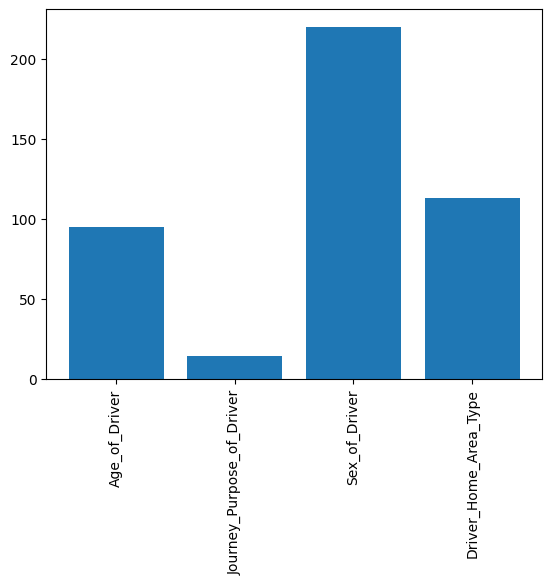

In [149]:
# Perform the feature selection
selector = SelectKBest(f_classif, k="all")
selector.fit(pred_var[predictors], pred_var["Accident_Severity"])

# Here we will get the p-values for each feature and then transform from p-values into some scores
scores = -np.log10(selector.pvalues_)
# Use plt to plot the scores!  
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

## Quesstion I
##### Can we make predictions about when and where accidents will occur, and the severity of the injuries sustained from the data supplied to improve road safety? How well do our models compare to government models?

## -Predicting when and where accidents will occur
### Using KMeans Clustering

In [161]:
kmeans=KMeans(n_clusters=10)
kmeans.fit(drive_conditions)

KMeans(n_clusters=10)

In [162]:
labels = kmeans.predict(drive_conditions)
centroids = kmeans.cluster_centers_
labels
centroids

array([1, 5, 1, ..., 2, 1, 2], dtype=int32)

array([[50.        ,  1.48590705],
       [30.        ,  1.17500678],
       [60.        ,  1.200409  ],
       [40.        ,  1.18218909],
       [70.        ,  1.52394881],
       [20.        ,  1.16451128],
       [60.        ,  7.20648344],
       [30.        ,  7.78062033],
       [20.        ,  7.83252033],
       [40.        ,  7.47919656]])

Text(0.5, 0, 'Speed Limits')

Text(0, 0.5, 'Weather Conditions')

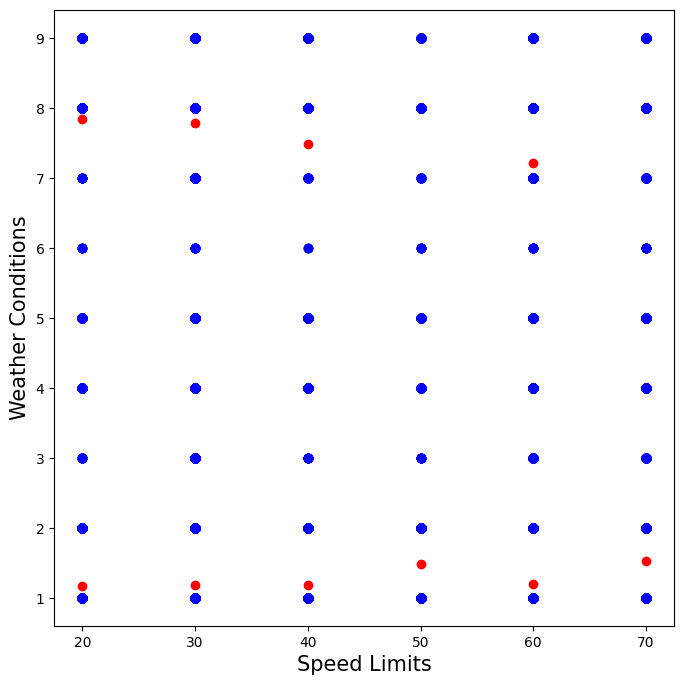

In [165]:
fig = plt.figure(figsize=(8, 8))
plt.style.use('default')
colors = map(lambda x: colmap[x+1], labels)
plt.scatter(drive_conditions['Speed_limit'], drive_conditions['Weather_Conditions'], color="blue")
plt.scatter(centroids[:,0], centroids[:,1], color="red")
plt.xlabel('Speed Limits',fontdict = {'fontsize' : 15}, color = 'black')
plt.ylabel('Weather Conditions', fontdict = {'fontsize' : 15}, color = 'black')
plt.show()

In [150]:
#Performing feature selection using KBest
my_X = df1

In [151]:
# selecting categorical variables to be encoded
X_categorical = my_X[['Accident_Index', 'Time', 'Local_Authority_(Highway)', 'LSOA_of_Accident_Location', 'Daily_Time_Periods', 'Date', 'Converted_time']]

In [152]:
#Dropping the categorical variables from the data
use_X = my_X.drop(X_categorical, axis=1)

In [153]:
#Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_categorical = X_categorical.apply(le.fit_transform)

In [154]:
#Bringing back the encoded categorical variables
X_new = pd.concat([use_X, X_categorical], axis=1)

In [155]:
#Selecting arbitrarily columns to be tested for feature importance
predictors = ['Light_Conditions', 'Casualty_Class', 'Age_Band_of_Casualty', 'Sex_of_Casualty', 
 'Age_of_Casualty', 'Skidding_and_Overturning', 'Sex_of_Driver', 'Vehicle_Leaving_Carriageway', 'Casualty_Severity', 'Urban_or_Rural_Area', 'Speed_limit', 'Vehicle_Manoeuvre', 'Number_of_Casualties',
 'Journey_Purpose_of_Driver', 'Road_Surface_Conditions', 'Pedestrian_Movement', 'Junction_Control', 'Weather_Conditions', 'Age_of_Driver']

In [156]:
#Filtering the select features
pred_var = X_new.filter(['Light_Conditions', 'Casualty_Class', 'Age_Band_of_Casualty', 'Sex_of_Casualty',
                        'Age_of_Casualty', 'Skidding_and_Overturning', 'Sex_of_Driver', 'Vehicle_Leaving_Carriageway', 'Casualty_Severity', 'Urban_or_Rural_Area', 'Speed_limit', 'Vehicle_Manoeuvre',
                        'Number_of_Casualties', 'Journey_Purpose_of_Driver', 'Road_Surface_Conditions',
                        'Pedestrian_Movement', 'Junction_Control', 'Weather_Conditions', 'Age_of_Driver', 'Accident_Severity'], axis=1)

In [157]:
# Perform the feature selection
selector = SelectKBest(f_classif, k="all")
selector.fit(pred_var[predictors], pred_var["Accident_Severity"])

# Here we will get the p-values for each feature and then transform from p-values into some scores
scores = -np.log10(selector.pvalues_)

SelectKBest(k='all')

<BarContainer object of 19 artists>

([<matplotlib.axis.XTick at 0x7f841a4dded0>,
 [Text(0, 0, 'Light_Conditions'),
  Text(0, 0, 'Casualty_Class'),
  Text(0, 0, 'Age_Band_of_Casualty'),
  Text(0, 0, 'Sex_of_Casualty'),
  Text(0, 0, 'Age_of_Casualty'),
  Text(0, 0, 'Skidding_and_Overturning'),
  Text(0, 0, 'Sex_of_Driver'),
  Text(0, 0, 'Vehicle_Leaving_Carriageway'),
  Text(0, 0, 'Casualty_Severity'),
  Text(0, 0, 'Urban_or_Rural_Area'),
  Text(0, 0, 'Speed_limit'),
  Text(0, 0, 'Vehicle_Manoeuvre'),
  Text(0, 0, 'Number_of_Casualties'),
  Text(0, 0, 'Journey_Purpose_of_Driver'),
  Text(0, 0, 'Road_Surface_Conditions'),
  Text(0, 0, 'Pedestrian_Movement'),
  Text(0, 0, 'Junction_Control'),
  Text(0, 0, 'Weather_Conditions'),
  Text(0, 0, 'Age_of_Driver')])

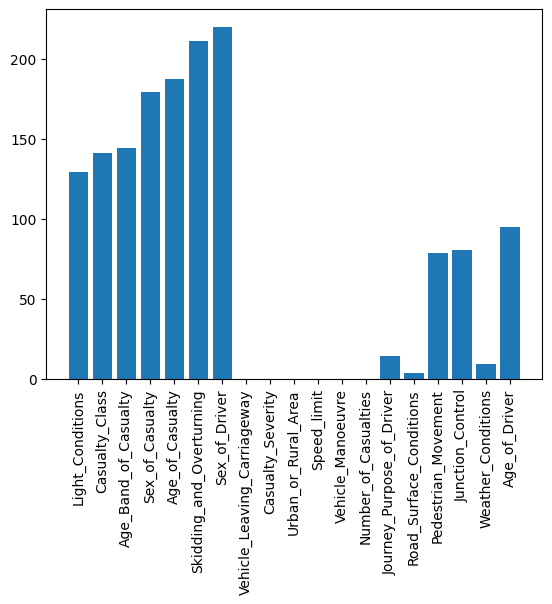

In [158]:
# Use plt to plot the scores!  
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [166]:
#analysing features for multicolinearity
corr_map = pred_var.corr()

<Figure size 1500x1000 with 0 Axes>

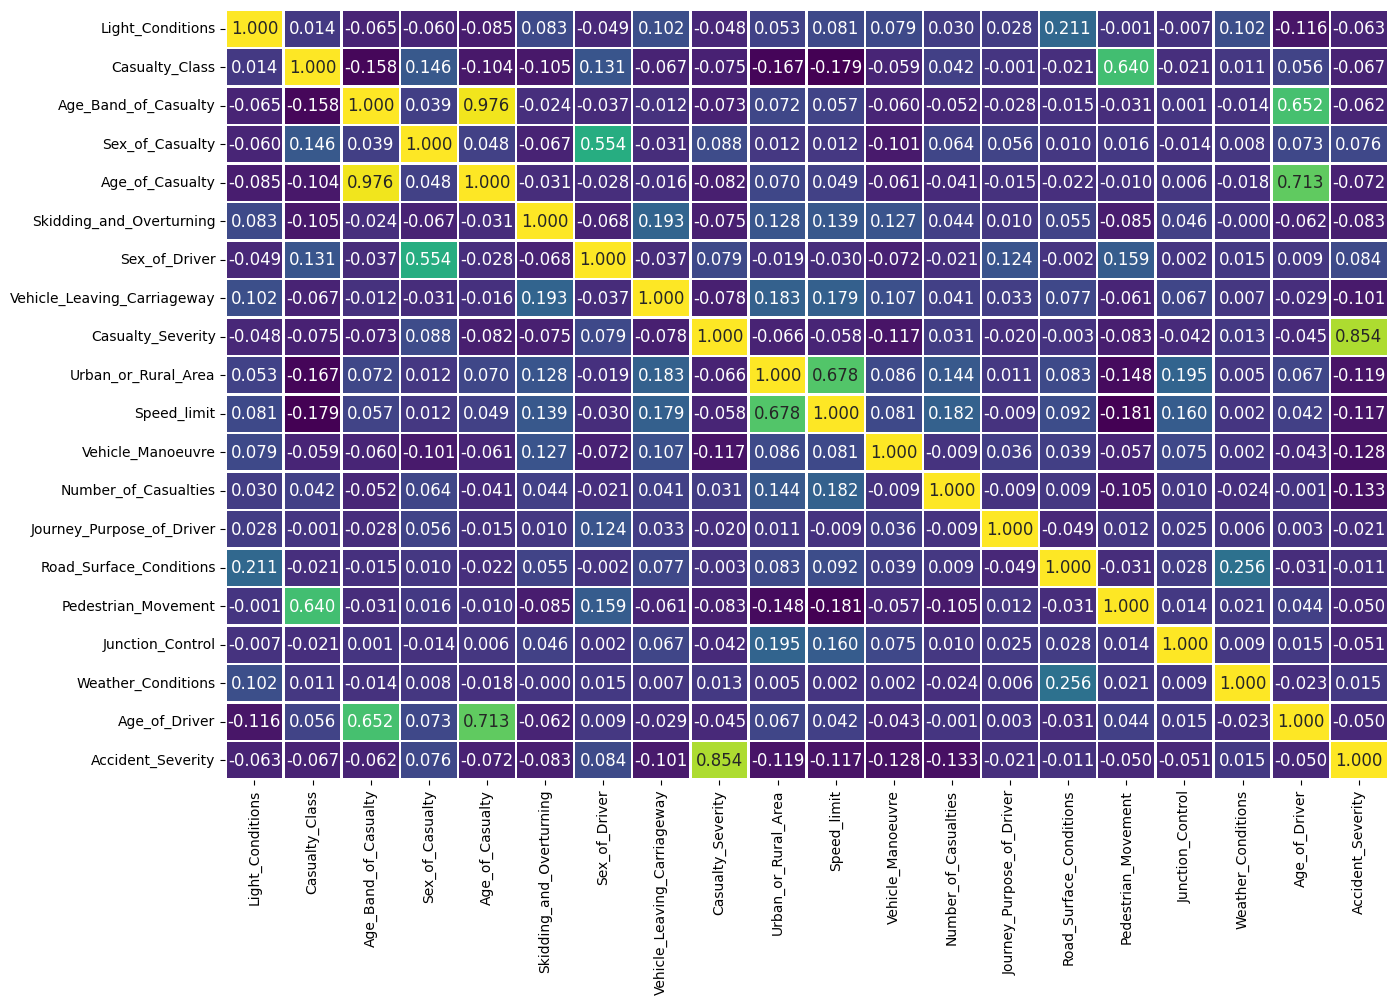

In [172]:
plt.figure(figsize=(15, 10), dpi=100) 
_ = sns.heatmap(corr_map, annot=True, annot_kws={"fontsize":12}, linecolor='white', \
            linewidth=1, fmt='.3f', cmap="viridis", cbar=False)

In [173]:
#Selecting features
ML_data = df1[['Light_Conditions', 'Age_of_Casualty', 'Skidding_and_Overturning', 'Sex_of_Driver', 'Vehicle_Leaving_Carriageway', 'Casualty_Severity', 'Speed_limit', 'Journey_Purpose_of_Driver', 'Road_Surface_Conditions',
               'Pedestrian_Movement', 'Junction_Control', 'Weather_Conditions', 'Accident_Severity']]
ML_data

,Light_Conditions,Age_of_Casualty,Skidding_and_Overturning,Sex_of_Driver,Vehicle_Leaving_Carriageway,Casualty_Severity,Speed_limit,Journey_Purpose_of_Driver,Road_Surface_Conditions,Pedestrian_Movement,Junction_Control,Weather_Conditions,Accident_Severity
0,4.0,21.0,0.0,1,0.0,3,30.0,1.0,1.0,0,4.0,1,3
1,4.0,68.0,0.0,1,0.0,2,20.0,1.0,1.0,4,4.0,1,2
2,4.0,47.0,0.0,2,0.0,3,30.0,6.0,1.0,0,4.0,1,3
3,4.0,16.0,0.0,2,0.0,3,30.0,6.0,1.0,0,4.0,1,3
4,4.0,20.0,0.0,1,0.0,3,30.0,6.0,1.0,0,4.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141262,1.0,24.0,1.0,1,1.0,3,60.0,1.0,2.0,0,4.0,1,3
141263,1.0,22.0,0.0,1,0.0,3,60.0,1.0,2.0,0,4.0,1,3
141264,1.0,61.0,0.0,1,0.0,3,60.0,6.0,1.0,0,4.0,1,3
141265,1.0,54.0,0.0,1,3.0,3,30.0,5.0,1.0,3,4.0,1,3


In [174]:
#viewing the label
ML_data['Accident_Severity'].value_counts()

3    107108
2     31345
1      2814
Name: Accident_Severity, dtype: int64

In [176]:
#Bring my classes to two
def severity(sev_code):
  if sev_code ==1:
    return 2
  elif sev_code ==2:
    return 2
  elif sev_code ==3:
    return 3

In [177]:
#apply function   
ML_data['Accident_Severity'] = ML_data['Accident_Severity'].apply(severity)

In [178]:
ML_data['Accident_Severity'].value_counts()

3    107108
2     34159
Name: Accident_Severity, dtype: int64

### Prediction using stacking model

In [179]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [180]:
#A function that incorporateS 4 models: DecisionTreeClassifier, KNeighborsClassifier, LogisticRegression and GaussianNB
def get_models():
  models = dict()
  models['dtree'] = DecisionTreeClassifier()
  models['knn'] = KNeighborsClassifier()
  models['lr'] = LogisticRegression()
  models['bayes'] = GaussianNB()
  return models

In [181]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)

#Splitting my data into X and y components
y_target = ML_data['Accident_Severity'].values
Xfeatures = ML_data.drop('Accident_Severity', axis=1)

#Defining a function to use test-train split
def get_dataset():
  #Resampling
  X_train_res, y_train_res = sm.fit_resample(Xfeatures, y_target.ravel())  

  #splitting the resampled data
  X_train, X_validation, y_train, y_validation = train_test_split(X_train_res, y_train_res, test_size=0.25, random_state=1)
  #return X_train, y_train
  return X_train, y_train

In [182]:
print("Before OverSampling, counts of label '2': {}".format(sum(ML_data['Accident_Severity'] == 2)))
print("Before OverSampling, counts of label '3': {} \n".format(sum(ML_data['Accident_Severity'] == 3)))

Before OverSampling, counts of label '2': 34159
Before OverSampling, counts of label '3': 107108 



In [183]:
#Building my models
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    model.fit(X, y)
    return scores
#Grab hold of the dataset.
X, y = get_dataset()
#Grab the models to use.
models = get_models()
#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>dtree 0.930 (0.002)
>knn 0.887 (0.002)
>lr 0.912 (0.009)
>bayes 0.925 (0.002)


In [184]:
print('After OverSampling, the shape of train_X: {}'.format(X.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y.shape))
print("After OverSampling, counts of label '2': {}".format(sum(y == 2)))
print("After OverSampling, counts of label '3': {}".format(sum(y == 3)))

After OverSampling, the shape of train_X: (160662, 12)
After OverSampling, the shape of train_y: (160662,) 

After OverSampling, counts of label '2': 80489
After OverSampling, counts of label '3': 80173


{'boxes': [<matplotlib.lines.Line2D at 0x7f8418a5ddd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f84189e3e90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f84189f3450>,
 'means': [<matplotlib.lines.Line2D at 0x7f84189ebed0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f84189eb990>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f84189e3410>,
  <matplotlib.lines.Line2D at 0x7f84189a49d0>]}

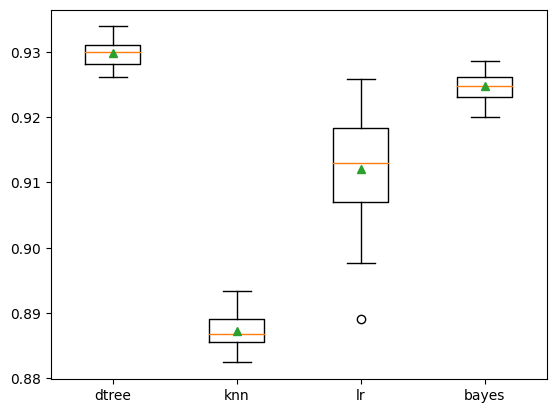

In [185]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [186]:
#Using Decision tree model built to predict my validation data.
Y_pred_prob = models['dtree'].predict_proba(Xfeatures)
Y_pred_prob

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       ...,
       [0.20833333, 0.79166667],
       [0.        , 1.        ],
       [1.        , 0.        ]])

In [187]:
Y_pred = models['dtree'].predict(Xfeatures)
Y_pred

array([3, 2, 3, ..., 3, 3, 2])

In [188]:
#Accuracy score of my model
accuracy_score(y_target, Y_pred)

0.9582351150657974

In [189]:
#Converting my prediction probabilities to DataFrame
pred_df = pd.DataFrame(Y_pred_prob, columns = ['Serious','Slight'])


In [190]:
#Converting my prediction y_targ to DataFrame
y_targ = pd.DataFrame(y_target, columns = ['Acc_sev'])

In [191]:
#Function to class probability predictions
res = []

for serious, slight in zip(pred_df['Serious'], pred_df['Slight']):
  if serious >= 0.5:
    res.append(1)
  else:
    res.append(2)

In [192]:
res_series = pd.Series(res, name = 'Acc_Class')
pred_df['Acc_Class'] = res_series
pred_df['accident_index'] = df1['Accident_Index']
pred_df

,Serious,Slight,Acc_Class,accident_index
0,0.000000,1.000000,2,2019010155191
1,1.000000,0.000000,1,2019010155192
2,0.000000,1.000000,2,2019010155194
3,0.000000,1.000000,2,2019010155194
4,0.052632,0.947368,2,2019010155195
...,...,...,...,...
141262,0.000000,1.000000,2,2019984106919
141263,0.000000,1.000000,2,2019984107019
141264,0.208333,0.791667,2,2019984107219
141265,0.000000,1.000000,2,2019984107419


In [193]:
# Importing the cas adjustment lookup
cas_adj = pd.read_csv('gdrive/MyDrive/Colab Notebooks/771762/cas_adjustment_lookup_2019.csv', dtype={'Accident_Index':str})
cas_adj

,accident_index,Vehicle_Reference,Casualty_Reference,Adjusted_Serious,Adjusted_Slight,Injury_Based
0,200401BS00001,1,1,0.239280,0.760720,0
1,200401BS00002,1,1,1.000000,0.000000,0
2,200401BS00003,1,1,0.057141,0.942859,0
3,200401BS00003,1,2,0.048599,0.951401,0
4,200401BS00004,1,1,0.187000,0.813000,0
...,...,...,...,...,...,...
3314732,2019984106919,1,1,0.183336,0.816664,0
3314733,2019984107019,1,1,0.074588,0.925412,0
3314734,2019984107219,2,1,0.048524,0.951476,0
3314735,2019984107419,1,1,0.183316,0.816684,0


In [194]:
#Function to class probability of government model
res_adj = []

for adj_serious, adj_slight in zip(cas_adj['Adjusted_Serious'], cas_adj['Adjusted_Slight']):
  if adj_serious >= 0.5:
    res_adj.append(1)
  else:
    res_adj.append(2)

In [195]:
res_adj_series = pd.Series(res_adj, name = 'Acc_Class')
cas_adj['Adjusted_Acc_Class'] = res_adj_series
cas_adj

,accident_index,Vehicle_Reference,Casualty_Reference,Adjusted_Serious,Adjusted_Slight,Injury_Based,Adjusted_Acc_Class
0,200401BS00001,1,1,0.239280,0.760720,0,2
1,200401BS00002,1,1,1.000000,0.000000,0,1
2,200401BS00003,1,1,0.057141,0.942859,0,2
3,200401BS00003,1,2,0.048599,0.951401,0,2
4,200401BS00004,1,1,0.187000,0.813000,0,2
...,...,...,...,...,...,...,...
3314732,2019984106919,1,1,0.183336,0.816664,0,2
3314733,2019984107019,1,1,0.074588,0.925412,0,2
3314734,2019984107219,2,1,0.048524,0.951476,0,2
3314735,2019984107419,1,1,0.183316,0.816684,0,2


In [196]:
cas_adj['accident_index'].isin(pred_df['accident_index']).value_counts()

False    3173969
True      140768
Name: accident_index, dtype: int64

In [197]:
merged_adjust = pd.merge(pred_df, cas_adj, how='inner', on=['accident_index', 'accident_index'])
merged_adjust

,Serious,Slight,Acc_Class,accident_index,Vehicle_Reference,Casualty_Reference,Adjusted_Serious,Adjusted_Slight,Injury_Based,Adjusted_Acc_Class
0,0.000000,1.000000,2,2019010155191,2,1,0.000000,1.000000,1,2
1,1.000000,0.000000,1,2019010155192,1,1,1.000000,0.000000,1,1
2,0.000000,1.000000,2,2019010155194,1,2,0.000000,1.000000,1,2
3,0.000000,1.000000,2,2019010155194,1,1,0.000000,1.000000,1,2
4,0.000000,1.000000,2,2019010155194,1,2,0.000000,1.000000,1,2
...,...,...,...,...,...,...,...,...,...,...
244940,0.000000,1.000000,2,2019984106919,1,1,0.183336,0.816664,0,2
244941,0.000000,1.000000,2,2019984107019,1,1,0.074588,0.925412,0,2
244942,0.208333,0.791667,2,2019984107219,2,1,0.048524,0.951476,0,2
244943,0.000000,1.000000,2,2019984107419,1,1,0.183316,0.816684,0,2


In [198]:
#score of my model against government model
accuracy_score(merged_adjust['Adjusted_Acc_Class'], merged_adjust['Acc_Class'])

0.8832227642940252